# 국내 코로나 사태에 대한 데이터 시각화 및 변수간 연관성에 대해 조사 

```

1) 기온과 습도가 확진자 수에 미치는 영향
2) 사건별 확진자 수 추이
3) 성별이 코로나 감염과 사망에 미치는 영향
4) 정책이 확진자수 변화에 미치는 영향
5) 연령이 완치율에 미치는 영향
6) 코로나 발병 전후에 따른 미세먼지 농도 변화

```

#### 패키지 불러오기

In [1]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
import missingno as msno
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, timedelta
import missingno as msno
from matplotlib import font_manager, rc
from matplotlib import style
from datetime import date, timedelta
import time
import datetime
import calendar

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

import matplotlib.font_manager as fm
from pyecharts import Line,Grid,Pie,Bar,Overlap

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "C:\Users\shs40\anaconda3\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [2]:
# 한글 나오도록 설정하기
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))

# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [3]:
df_case = pd.read_csv("Case.csv")
df_patientinfo = pd.read_csv("PatientInfo.csv")
df_patientroute = pd.read_csv("PatientRoute.csv")
df_policy = pd.read_csv("Policy.csv")
df_region = pd.read_csv("Region.csv")
df_searchtrend = pd.read_csv("SearchTrend.csv")
df_seoulfloating = pd.read_csv("SeoulFloating.csv")
df_time = pd.read_csv("Time.csv")
df_timeage = pd.read_csv("TimeAge.csv")
df_timegender = pd.read_csv("TimeGender.csv")
df_timeprovince = pd.read_csv("TimeProvince.csv")
df_weather = pd.read_csv("Weather.csv")

#### 전체적인 경향을 보기위해 누적 그래프 확인

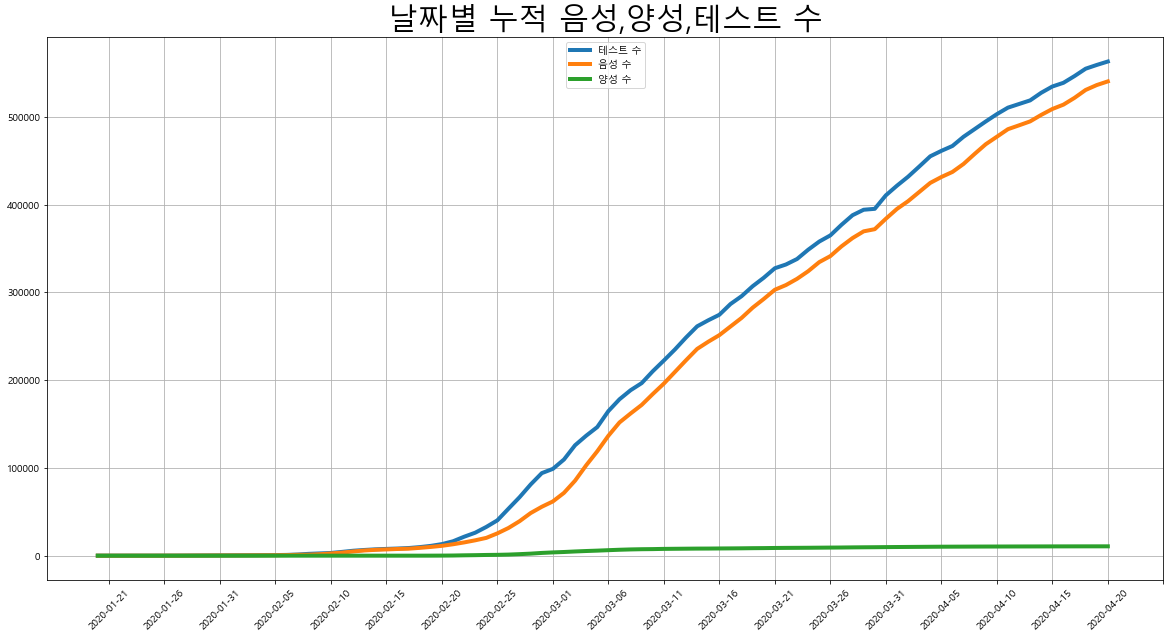

In [4]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.figure(figsize=(20, 10))

plt.plot(df_time.date, df_time.test,
         linewidth=4, label='테스트 수')

plt.plot(df_time.date, df_time.negative,
         linewidth=4, label='음성 수')

plt.plot(df_time.date, df_time.confirmed,
         linewidth=4, label='양성 수')
plt.xticks(np.arange(1, 100, 5), rotation=45)
plt.title('날짜별 누적 음성,양성,테스트 수',fontsize=30)

plt.legend(loc=9)
plt.grid()

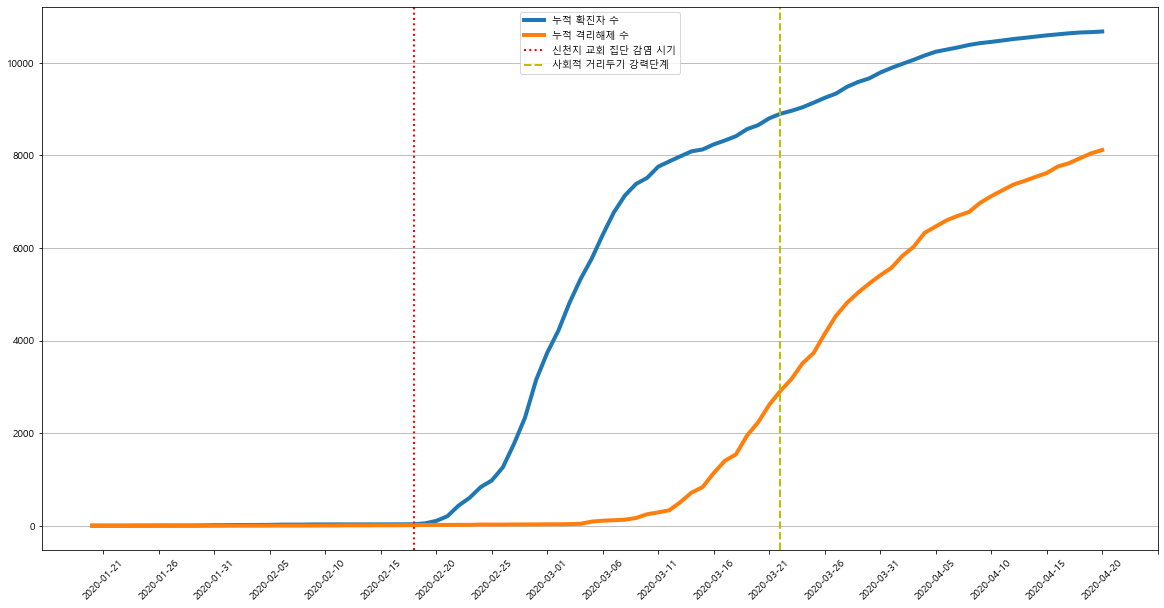

In [5]:
plt.figure(figsize=(20, 10))


plt.plot(df_time.date, df_time.confirmed,
         linewidth=4, label='누적 확진자 수',)

plt.plot(df_time.date, df_time.released,
         linewidth=4, label='누적 격리해제 수')


plt.xticks(np.arange(1, 100, 5), rotation=45)


plt.axvline(x='2020-02-18', ls=':', c='r',
            linewidth=2, label='신천지 교회 집단 감염 시기')
plt.axvline(x='2020-03-22', ls="--", c="y", linewidth=2,
            label='사회적 거리두기 강력단계')


plt.legend(loc=9)
plt.grid(axis='y')
plt.show()

#### 사망자 수는 상대적으로 적어서 그래프에서 표현하기 어려움

## 1) 기온과 습도가 확진자 수에 미치는 영향

### 데이터 확인

In [6]:
df_weather.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


In [7]:
df_weather.tail()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
25130,50000,Jeollabuk-do,2020-04-19,11.2,8.0,16.1,15.5,2.5,20.0,85.3
25131,51000,Jeollanam-do,2020-04-19,12.0,10.6,13.4,29.1,8.5,90.0,88.4
25132,60000,Gyeongsangbuk-do,2020-04-19,10.2,5.5,15.0,27.4,5.0,70.0,90.8
25133,61000,Gyeongsangnam-do,2020-04-19,11.1,9.6,14.2,30.0,4.5,70.0,82.3
25134,70000,Jeju-do,2020-04-19,13.3,11.0,15.6,19.5,9.5,90.0,85.4


In [8]:
df_timeprovince.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [9]:
df_timeprovince.tail()

,date,time,province,confirmed,released,deceased
1559,2020-04-20,0,Jeollabuk-do,17,9,0
1560,2020-04-20,0,Jeollanam-do,15,8,0
1561,2020-04-20,0,Gyeongsangbuk-do,1361,1064,51
1562,2020-04-20,0,Gyeongsangnam-do,116,87,0
1563,2020-04-20,0,Jeju-do,13,6,0


### 결측치 확인

code                      0
province                  0
date                      0
avg_temp                 15
min_temp                  5
max_temp                  3
precipitation             0
max_wind_speed            9
most_wind_direction      29
avg_relative_humidity    20
dtype: int64

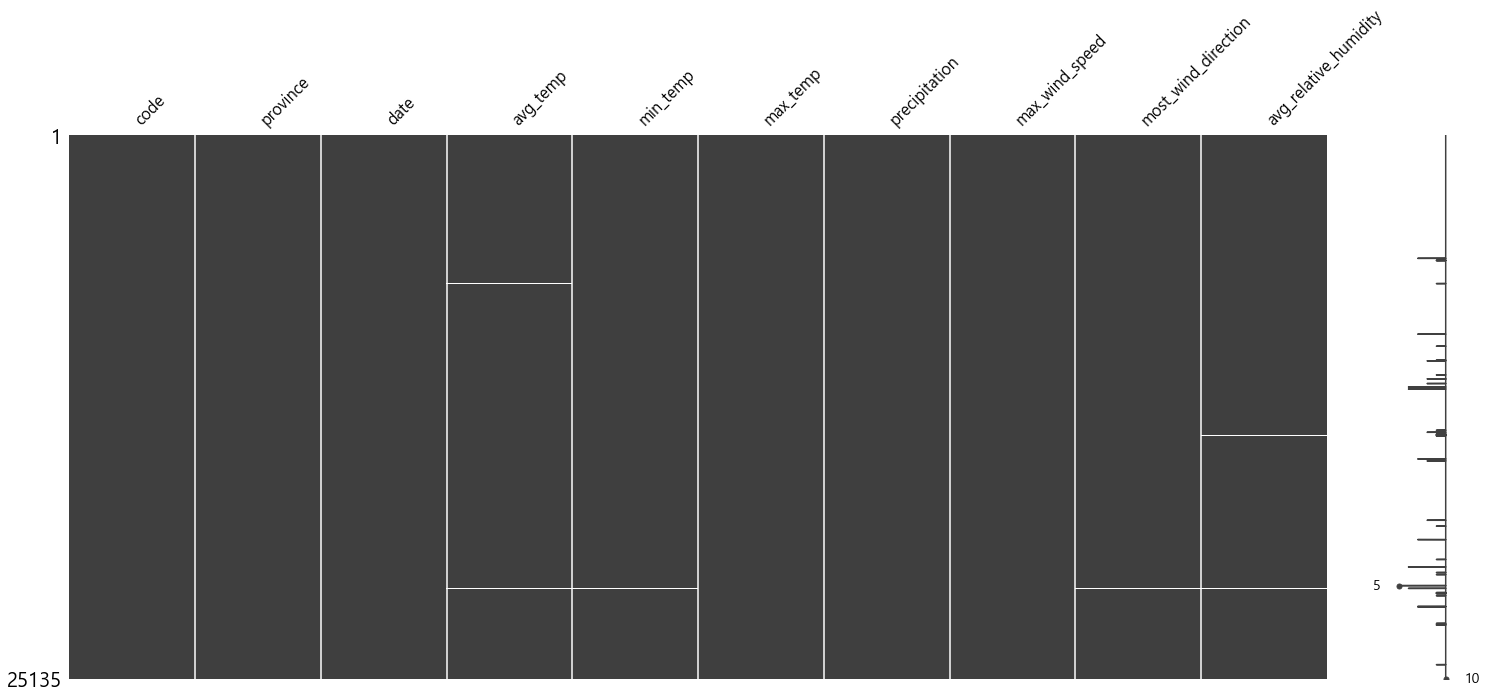

In [10]:
msno.matrix(df_weather)
df_weather.isnull().sum()

In [11]:
df_weather[pd.isnull(df_weather["avg_temp"])]

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
5693,60000,Gyeongsangbuk-do,2016-12-21,NaN,4.2,15.4,10.0,3.3,NaN,NaN
6861,60000,Gyeongsangbuk-do,2017-03-04,NaN,2.2,14.7,0.0,6.0,50.0,47.3
9197,60000,Gyeongsangbuk-do,2017-07-28,NaN,19.2,28.9,14.5,3.9,NaN,NaN
9202,12000,Daegu,2017-07-29,NaN,21.5,26.2,30.0,5.2,140.0,91.3
11482,41000,Chungcheongnam-do,2017-12-18,NaN,-5.0,6.8,0.3,5.8,250.0,NaN
11642,41000,Chungcheongnam-do,2017-12-28,NaN,-7.8,NaN,0.0,1.5,NaN,NaN
11737,41000,Chungcheongnam-do,2018-01-03,NaN,NaN,-0.2,0.0,5.1,NaN,NaN
13736,40000,Chungcheongbuk-do,2018-05-08,NaN,11.5,20.1,0.0,6.4,90.0,NaN
14969,41000,Chungcheongnam-do,2018-07-24,NaN,23.8,32.6,0.0,3.1,NaN,NaN
18697,41000,Chungcheongnam-do,2019-03-14,NaN,-5.6,10.8,0.0,5.3,NaN,NaN


In [12]:
df_weather[pd.isnull(df_weather["avg_relative_humidity"])]

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
5693,60000,Gyeongsangbuk-do,2016-12-21,NaN,4.2,15.4,10.0,3.3,NaN,NaN
9197,60000,Gyeongsangbuk-do,2017-07-28,NaN,19.2,28.9,14.5,3.9,NaN,NaN
11482,41000,Chungcheongnam-do,2017-12-18,NaN,-5.0,6.8,0.3,5.8,250.0,NaN
11642,41000,Chungcheongnam-do,2017-12-28,NaN,-7.8,NaN,0.0,1.5,NaN,NaN
11737,41000,Chungcheongnam-do,2018-01-03,NaN,NaN,-0.2,0.0,5.1,NaN,NaN
13643,51000,Jeollanam-do,2018-05-02,16.2,11.8,18.7,6.3,14.3,90.0,NaN
13736,40000,Chungcheongbuk-do,2018-05-08,NaN,11.5,20.1,0.0,6.4,90.0,NaN
13820,60000,Gyeongsangbuk-do,2018-05-13,17.6,12.8,25.1,1.5,5.3,180.0,NaN
13836,60000,Gyeongsangbuk-do,2018-05-14,21.9,14.1,29.0,0.0,4.8,180.0,NaN
13852,60000,Gyeongsangbuk-do,2018-05-15,24.4,18.4,30.2,0.0,6.9,180.0,NaN


date         0
time         0
province     0
confirmed    0
released     0
deceased     0
dtype: int64

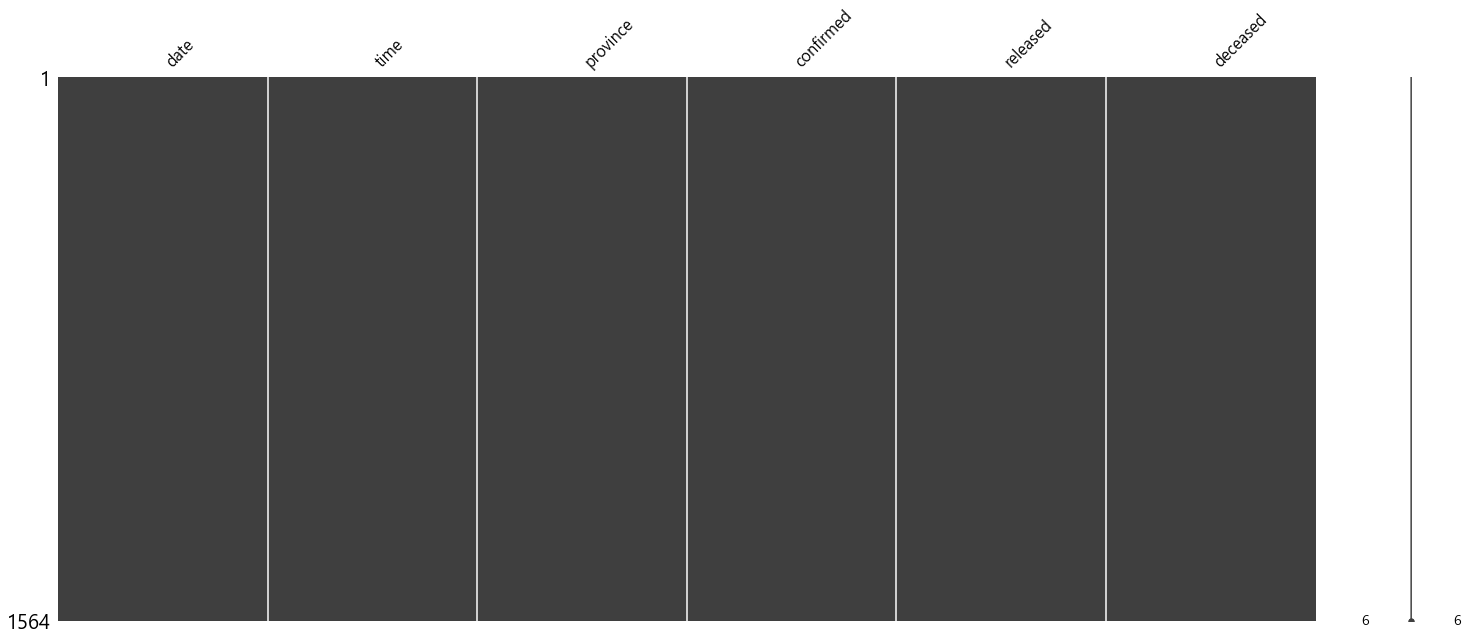

In [13]:
msno.matrix(df_timeprovince)
df_timeprovince.isnull().sum()

### 데이터 전처리

- weather데이터와 timepovince데이터에서 필요한 날짜만 가져오기
- weather: 2016년 1월 1일 ~ 2020년 4월 19일
- timeprovince: 2020년 1월 20일 ~ 2020년 4월 20일

In [14]:
df_wheather_co=df_weather[df_weather["date"]>"2020-01-19"]
df_timeprovince_co=df_timeprovince[df_timeprovince["date"]<"2020-04-20"]

- 각 dataframe에서 필요한 column 추출

In [15]:
df_weather_co=df_wheather_co[["province","date","avg_temp","avg_relative_humidity"]]
del df_timeprovince_co["time"]

- 각 지역별 데이터 개수 확인

In [16]:
df_weather_co.groupby(df_weather_co["province"]).size()

province
Busan                91
Chungcheongbuk-do    70
Chungcheongnam-do    91
Chunghceongbuk-do    21
Daegu                91
Daejeon              91
Gangwon-do           91
Gwangju              91
Gyeonggi-do          91
Gyeongsangbuk-do     91
Gyeongsangnam-do     91
Incheon              91
Jeju-do              91
Jeollabuk-do         91
Jeollanam-do         91
Seoul                91
Ulsan                91
dtype: int64

- Chung"hc"eongbuk-do 오타 수정

In [17]:
df_weather_co.loc[df_weather_co["province"]=="Chunghceongbuk-do","province"]="Chungcheongbuk-do"

- 오타 수정 확인

In [18]:
df_weather_co.groupby(df_weather_co["province"]).size()

province
Busan                91
Chungcheongbuk-do    91
Chungcheongnam-do    91
Daegu                91
Daejeon              91
Gangwon-do           91
Gwangju              91
Gyeonggi-do          91
Gyeongsangbuk-do     91
Gyeongsangnam-do     91
Incheon              91
Jeju-do              91
Jeollabuk-do         91
Jeollanam-do         91
Seoul                91
Ulsan                91
dtype: int64

- DataFrame의 데이터 개수 확인

In [19]:
len(df_weather_co),len(df_timeprovince_co)

(1456, 1547)

- timeprovince에 지역이 한 곳 더 있는것으로 보임

In [20]:
df_timeprovince_co.groupby(df_timeprovince_co["province"]).size()

province
Busan                91
Chungcheongbuk-do    91
Chungcheongnam-do    91
Daegu                91
Daejeon              91
Gangwon-do           91
Gwangju              91
Gyeonggi-do          91
Gyeongsangbuk-do     91
Gyeongsangnam-do     91
Incheon              91
Jeju-do              91
Jeollabuk-do         91
Jeollanam-do         91
Sejong               91
Seoul                91
Ulsan                91
dtype: int64

- weather에는 없는 지역 확인

In [21]:
set(pd.unique(df_timeprovince_co.province))-set(pd.unique(df_weather_co.province))

{'Sejong'}

- 세종 지역 제외

In [22]:
df_timeprovince_co=df_timeprovince_co.loc[df_timeprovince_co["province"]!="Sejong",:]

- 두 데이터의 개수 확인

In [23]:
len(df_weather_co),len(df_timeprovince_co)

(1456, 1456)

- weather와 timeprovince 두 데이터 프레임 병합

In [24]:
corona=pd.merge(left=df_timeprovince_co,right=df_weather_co,how='left',on=["province","date"])
corona.tail(20)

,date,province,confirmed,released,deceased,avg_temp,avg_relative_humidity
1436,2020-04-18,Jeollanam-do,15,7,0,13.7,72.6
1437,2020-04-18,Gyeongsangbuk-do,1358,1046,51,11.4,80.3
1438,2020-04-18,Gyeongsangnam-do,116,84,0,13.7,65.3
1439,2020-04-18,Jeju-do,13,6,0,12.9,74.5
1440,2020-04-19,Seoul,624,288,2,12.3,75.8
1441,2020-04-19,Busan,130,115,3,11.8,84.5
1442,2020-04-19,Daegu,6832,5743,161,11.1,91.9
1443,2020-04-19,Incheon,91,55,0,11.9,77.8
1444,2020-04-19,Gwangju,30,22,0,11.5,89.6
1445,2020-04-19,Daejeon,39,25,0,11.3,85.1


- 날짜 형식 '년-월-일' 에서 '월/일' 로 변경

In [25]:
corona["date"]=pd.to_datetime(corona["date"],format="%Y-%m-%d")
corona["date"]=corona["date"].dt.strftime("%m/%d")

- 누적으로 되어있는 확진자 수 
- 상위 4개 지역에 대하여 일 별 확진자수 구하기

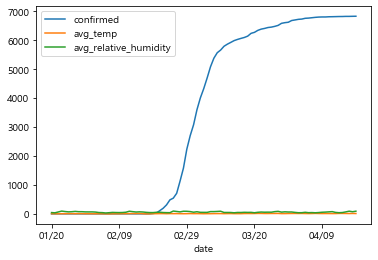

In [26]:
corona.loc[corona.province=="Daegu",["date","confirmed","avg_temp","avg_relative_humidity"]].plot(x="date")

In [27]:
corona[corona["date"]=="04/19"].sort_values("confirmed",ascending=False).head(4)

,date,province,confirmed,released,deceased,avg_temp,avg_relative_humidity
1442,04/19,Daegu,6832,5743,161,11.1,91.9
1453,04/19,Gyeongsangbuk-do,1359,1057,51,10.2,90.8
1447,04/19,Gyeonggi-do,654,370,14,11.8,90.1
1440,04/19,Seoul,624,288,2,12.3,75.8


In [28]:
list(corona[corona["date"]=="04/19"].sort_values("confirmed",ascending=False)["province"][0:4].values)

['Daegu', 'Gyeongsangbuk-do', 'Gyeonggi-do', 'Seoul']

In [29]:
Daegu=corona[corona["province"]=="Daegu"]
Gyeongsangbuk=corona[corona["province"]=="Gyeongsangbuk-do"]
Gyeonggi=corona[corona["province"]=="Gyeonggi-do"]
Seoul=corona[corona["province"]=="Seoul"]

In [30]:
def day(df):
    df.reset_index(drop=True,inplace=True)
    l=list()
    for i in df.index:
        if i==0:
            l.append(df["confirmed"].iloc[i])
        else:
            l.append(df["confirmed"].iloc[i]-df["confirmed"].iloc[i-1])
    df["day_confirmed"]=l

In [31]:
day(Daegu)
day(Gyeongsangbuk)
day(Gyeonggi)
day(Seoul)

### 시각화
- 확진자 수 상위 4개 지역에 대하여 날짜별 확진자, 기온, 습도 시각화

In [32]:
def co_plot(df,v,num=700):
    fig,ax1=plt.subplots(figsize=(15,10))
    ax2=ax1.twinx()

    line1=ax1.bar(df.date,df["day_confirmed"],color="skyblue")
    line2=ax2.plot(df.date,df[v],color="r")

    ax1.set_ylabel("Number",fontsize=15)
    ax1.set_ylim(0,num)
    ax1.set_xlim(-10,95)
    if v=="avg_temp":
        ax2.set_ylim(-15,35)
        ax2.set_ylabel("avg_temp",fontsize=15)
    else:
        ax2.set_ylim(0,130)
        ax2.set_ylabel("avg_relative_humidity",fontsize=15)
    ax1.set_xticks(np.arange(0,91,30))
    plt.title(df.iloc[0,1],fontsize=20)
    plt.grid(False)
    plt.show()

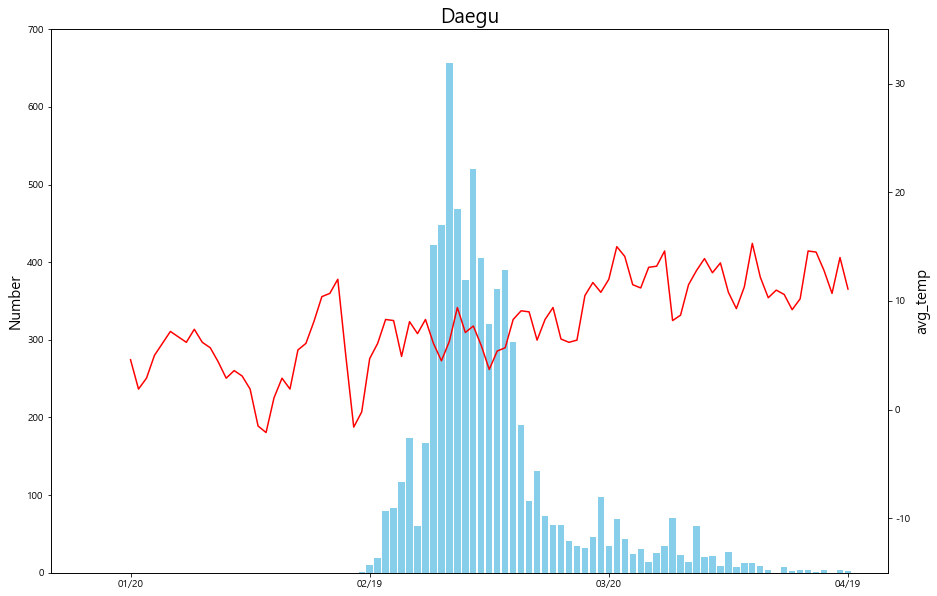

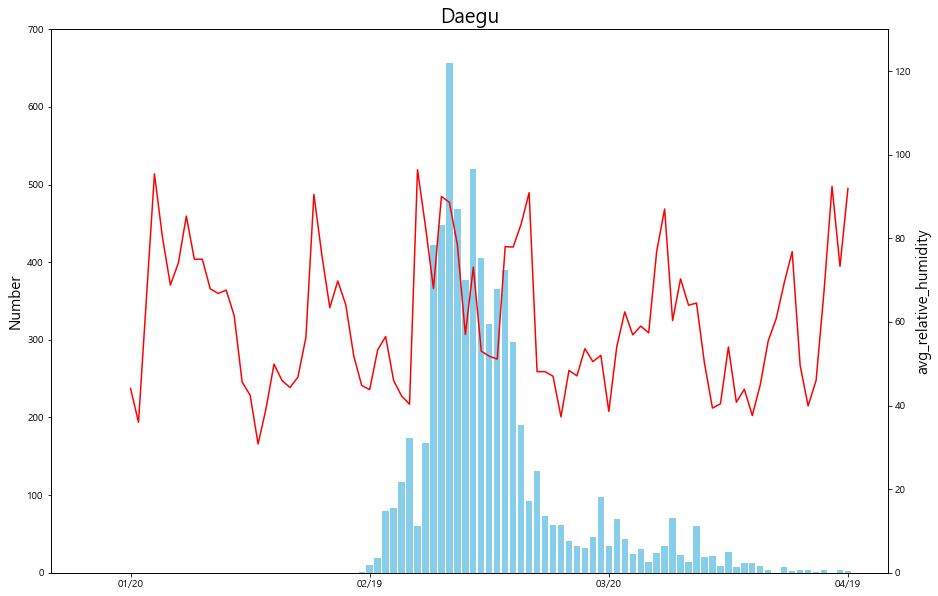

In [33]:
# Daegu
co_plot(Daegu,"avg_temp")
co_plot(Daegu,"avg_relative_humidity")

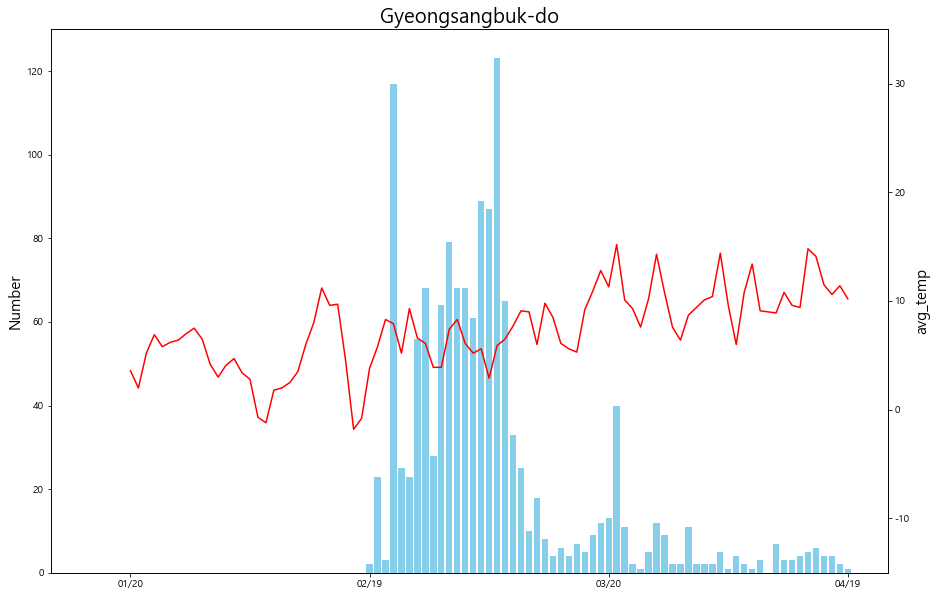

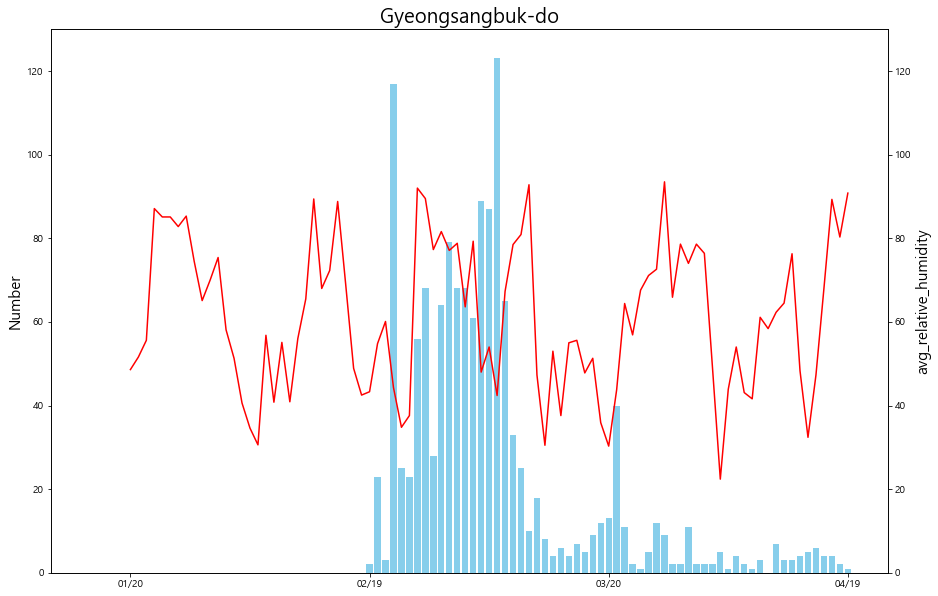

In [34]:
# Gyeongsangbuk
co_plot(Gyeongsangbuk,"avg_temp",130)
co_plot(Gyeongsangbuk,"avg_relative_humidity",130)

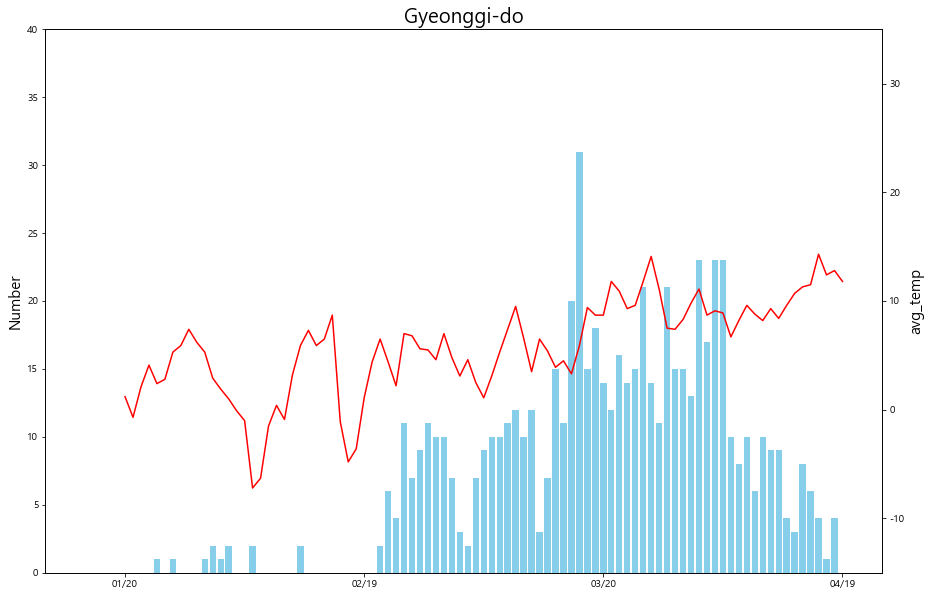

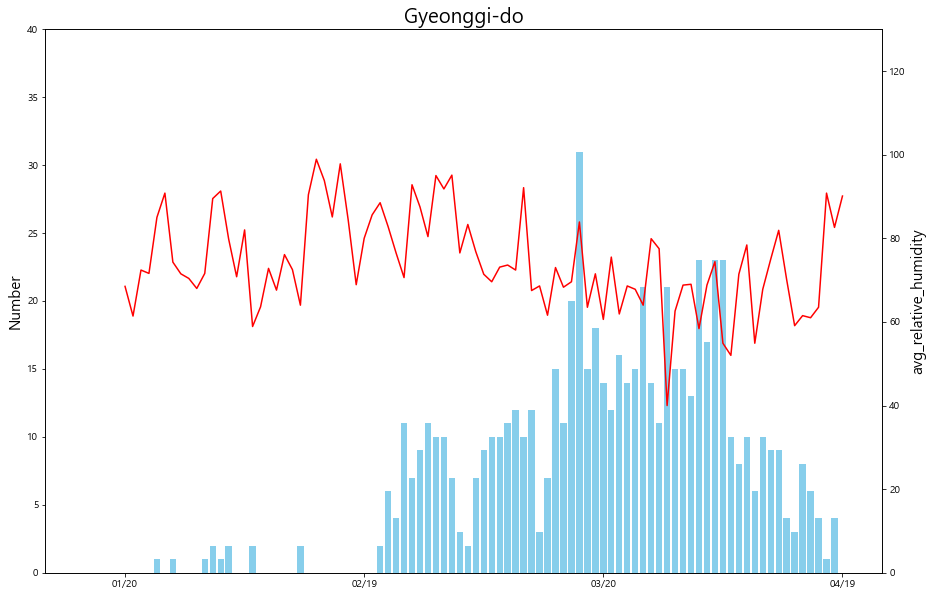

In [35]:
# Gyeonggi
co_plot(Gyeonggi,"avg_temp",40)
co_plot(Gyeonggi,"avg_relative_humidity",40)

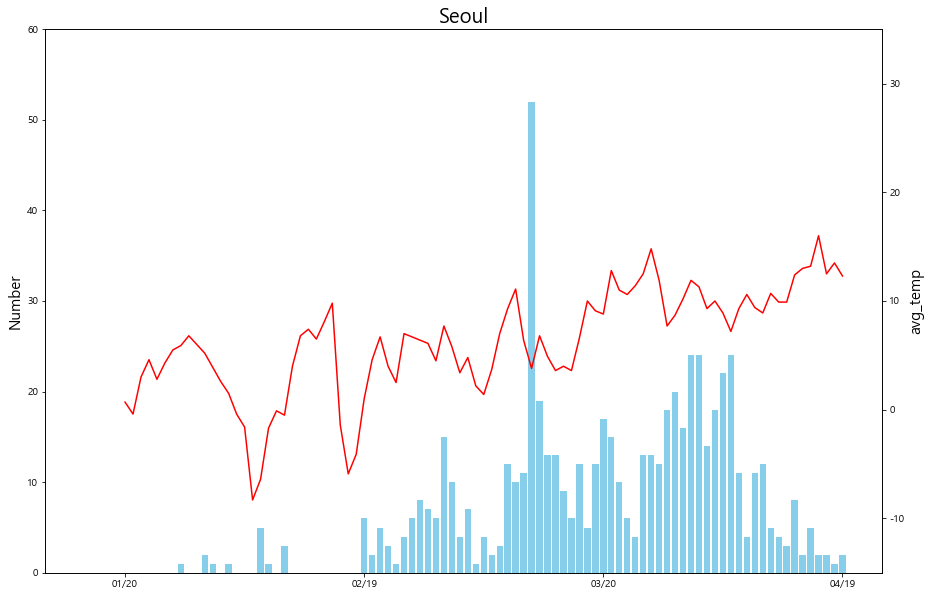

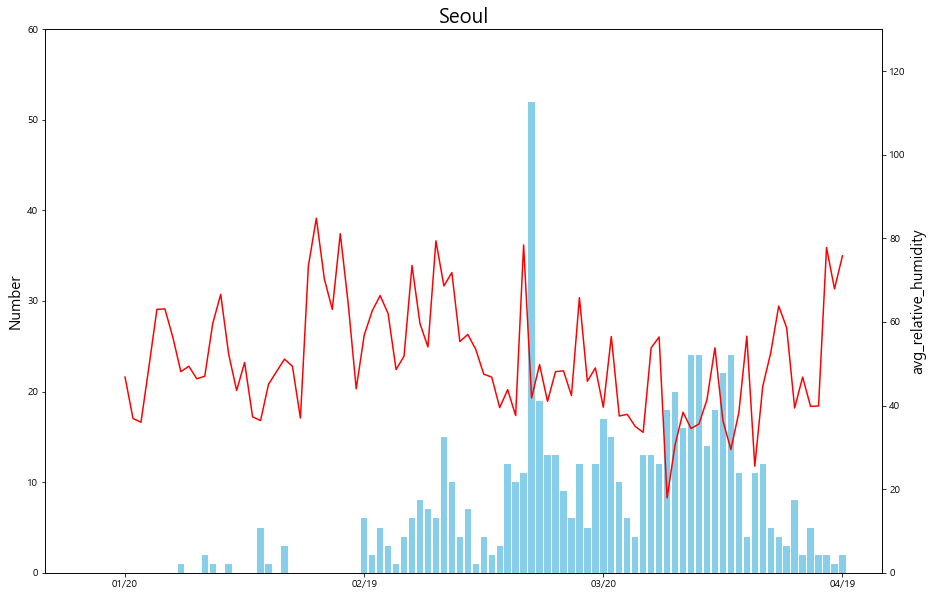

In [36]:
# Seoul
co_plot(Seoul,"avg_temp",60)
co_plot(Seoul,"avg_relative_humidity",60)

## 2) 환자수가 많이 발생한 사건 별로 시각화

- Patient Info와 Infection Case 두가지 가용 자료가 존재

In [37]:
df_patientinfo[pd.isnull(df_patientinfo["infection_case"])]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
718,1100000095,NaN,female,1932.0,80s,Korea,Busan,etc,NaN,NaN,NaN,NaN,24.0,2020-02-15,2020-03-13,NaN,NaN,deceased
758,1200000038,38.0,female,1963.0,50s,Korea,Daegu,Nam-gu,True,NaN,NaN,NaN,NaN,NaN,2020-02-18,NaN,2020-02-23,deceased
762,1200000045,45.0,female,1966.0,50s,Korea,Daegu,Dalseong-gun,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-19,NaN,NaN,isolated
763,1200000046,46.0,male,1992.0,20s,Korea,Daegu,Dalseo-gu,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-19,NaN,NaN,isolated
769,1200000053,53.0,female,1982.0,30s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-19,NaN,NaN,isolated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,6023000051,NaN,male,NaN,20s,Korea,Gyeongsangbuk-do,Pohang-si,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-26,NaN,NaN,isolated
3197,6023000052,NaN,male,NaN,20s,Korea,Gyeongsangbuk-do,Pohang-si,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-04,NaN,NaN,isolated
3228,6100000031,NaN,NaN,NaN,NaN,Korea,Gyeongsangnam-do,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-26,NaN,NaN,isolated
3229,6100000032,NaN,NaN,NaN,NaN,Korea,Gyeongsangnam-do,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-26,NaN,NaN,isolated


In [38]:
df_5 = df_patientinfo["infection_case"].fillna("NaN")

In [39]:
df_5 = pd.DataFrame(df_5)
df_5["COUNT"]=1
df_5

,infection_case,COUNT
0,overseas inflow,1
1,overseas inflow,1
2,contact with patient,1
3,overseas inflow,1
4,contact with patient,1
...,...,...
3321,overseas inflow,1
3322,overseas inflow,1
3323,contact with patient,1
3324,overseas inflow,1


In [40]:
df5 = df_5.groupby(["infection_case"]).sum().sort_values(["COUNT"],ascending=False)

- Patient Info 로 정리하니 사건별 정리가 아닌, 감염 형태별 정리만 가능. 

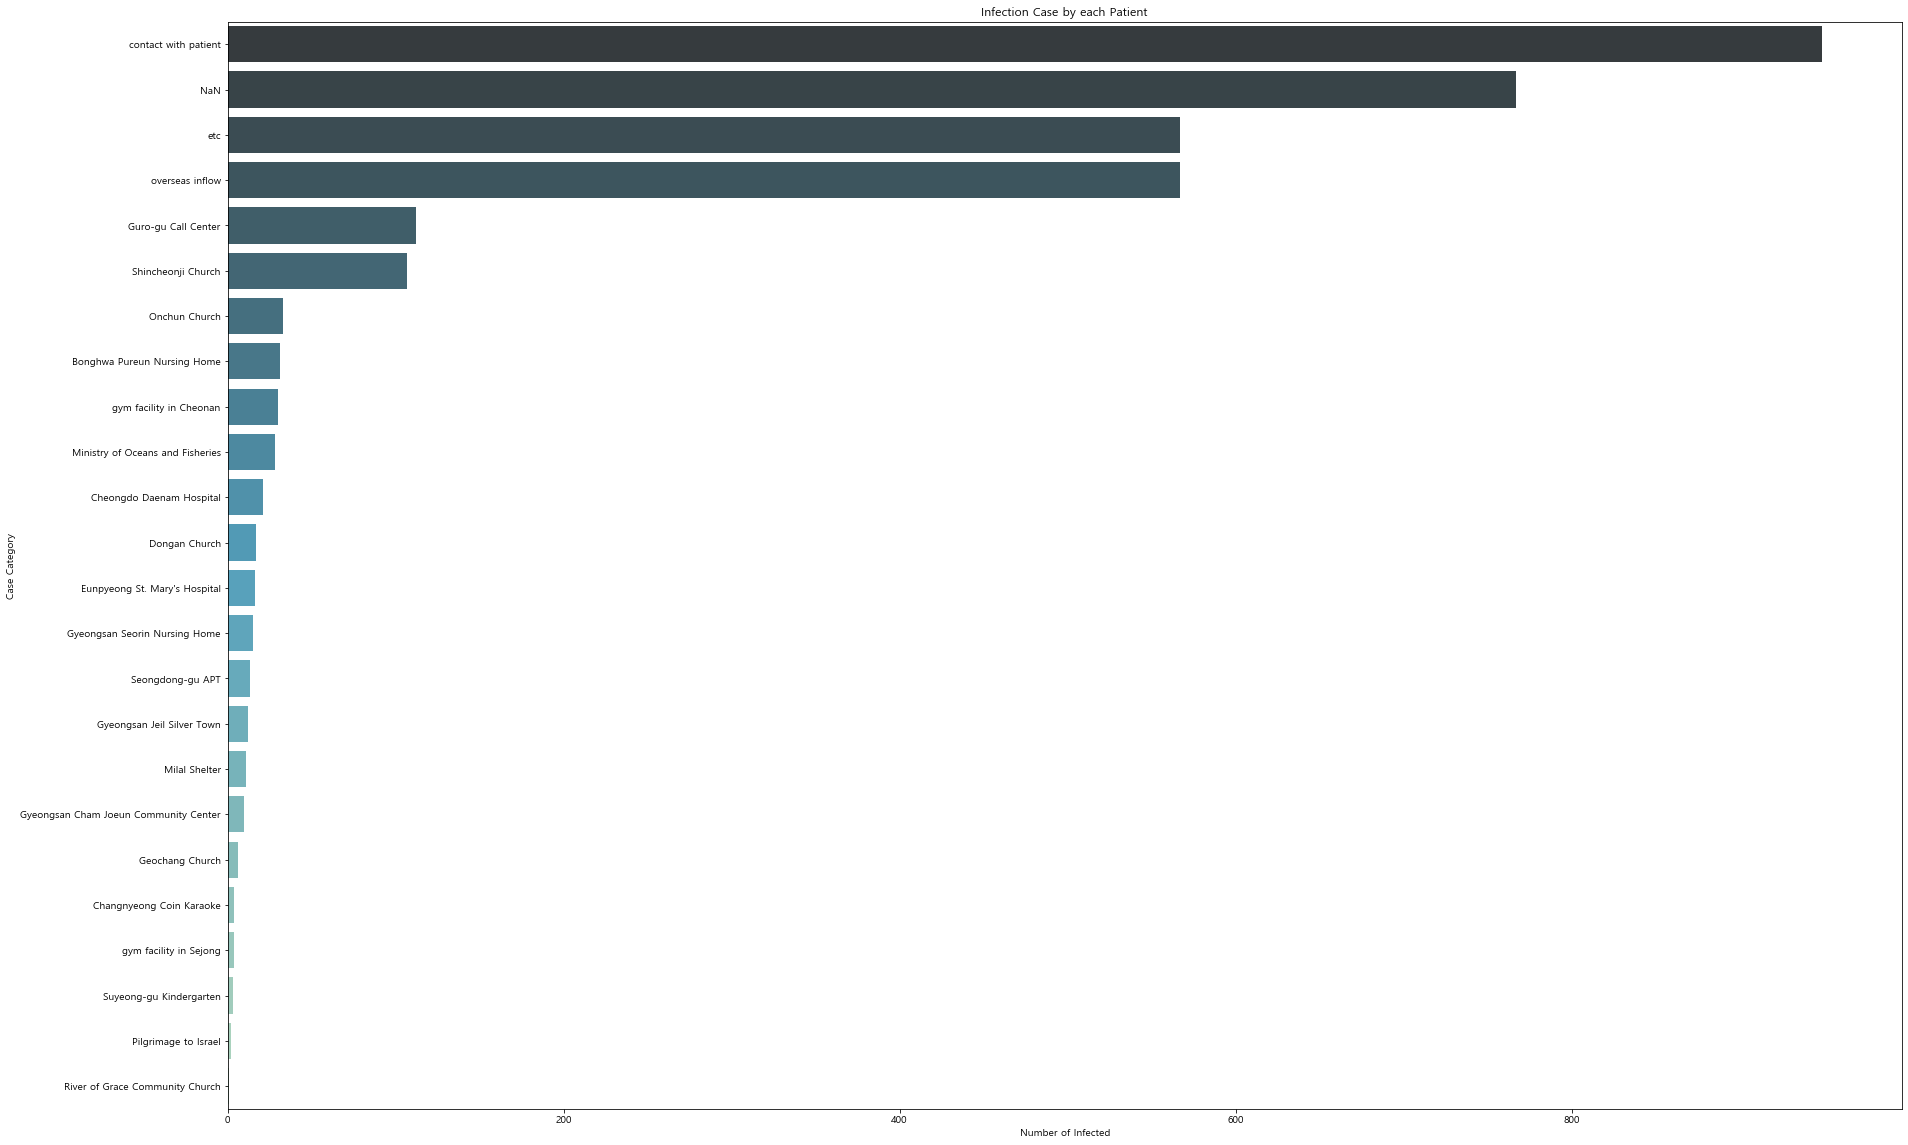

In [41]:
plt.figure(figsize=(30,20))
sns.barplot(x = "COUNT", y = df5.index, data = df5, palette="GnBu_d")
plt.title("Infection Case by each Patient")
plt.xlabel("Number of Infected")
plt.ylabel("Case Category")
plt.show()

- Infection Case 자료 결함 확인

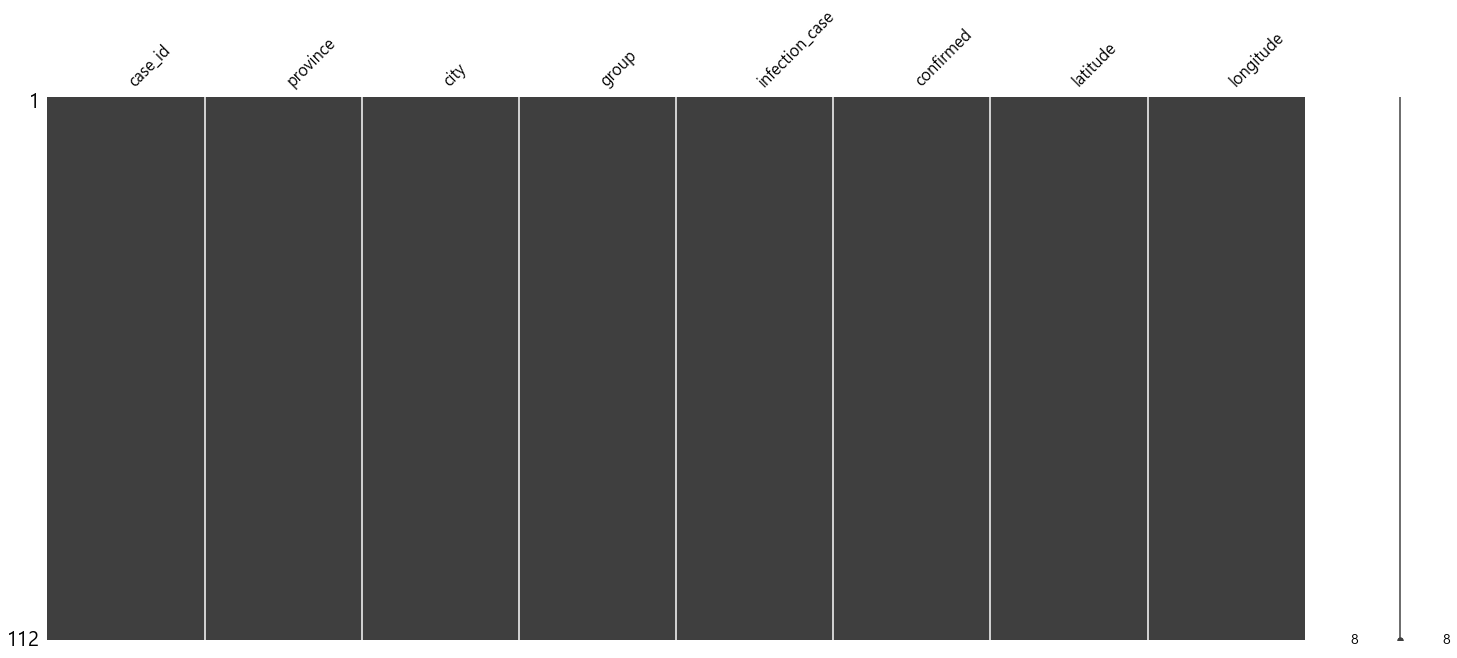

In [42]:
msno.matrix(df_case)

- 사건 별, 그리고 환자수로 그룹화 하여 상위 10개 추출

In [43]:
df6 = df_case.groupby(df_case["infection_case"])["confirmed"].max()
df6 = df6.sort_values(ascending = False).reset_index()
df6 = df6[0:10]
df6.iloc[2,0] = 'etc(Daegu)'
df6.iloc[1,0] = 'contact with patient(Daegu)'
df6

,infection_case,confirmed
0,Shincheonji Church,4510
1,contact with patient(Daegu),922
2,etc(Daegu),721
3,overseas inflow,313
4,Second Mi-Ju Hospital,195
5,Hansarang Convalescent Hospital,127
6,Cheongdo Daenam Hospital,120
7,gym facility in Cheonan,103
8,Daesil Convalescent Hospital,100
9,Guro-gu Call Center,98


- 상위 10개 사건에 대해 Bar Graph 로 시각화, 상위 3건 모두 대구, 전체 환자수의 62% 상당

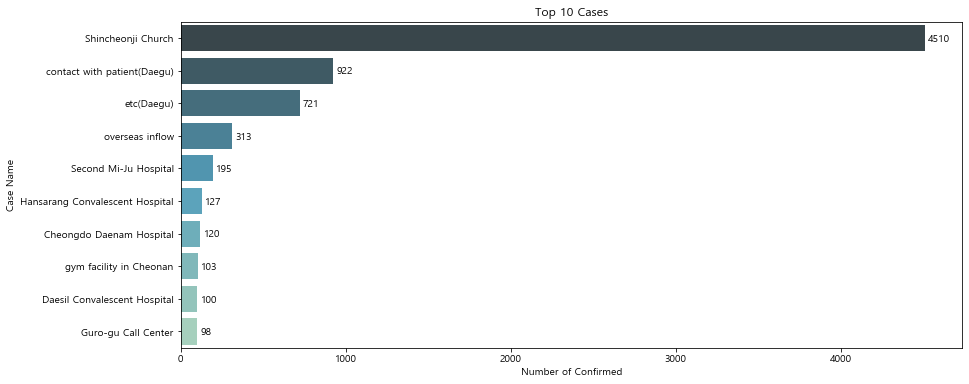

In [44]:
plt.figure(figsize=(14, 6))
sns.barplot(x = "confirmed", y = "infection_case", data = df6, palette="GnBu_d")
plt.xlabel("Number of Confirmed")
plt.ylabel("Case Name")
plt.title("Top 10 Cases")
for value, index in zip(df6["confirmed"], np.linspace(0,10,11)):
    plt.text (value+20, index+0.1, str(value))

In [45]:
df_policy.tail(10)

,policy_id,country,type,gov_policy,detail,start_date,end_date
34,35,Korea,Education,School Opening Delay,middle school,2020-03-02,2020-04-06
35,36,Korea,Education,School Opening Delay,elementary school,2020-03-02,2020-04-06
36,37,Korea,Education,School Opening with Online Class,high school (3rd grade),2020-04-09,NaN
37,38,Korea,Education,School Opening with Online Class,middle school (3rd grade),2020-04-09,NaN
38,39,Korea,Education,School Opening with Online Class,high school (1st ~ 2nd grade),2020-04-16,NaN
39,40,Korea,Education,School Opening with Online Class,middle school (1st ~ 2nd grade),2020-04-16,NaN
40,41,Korea,Education,School Opening with Online Class,elementary school (4th ~ 6th grade),2020-04-16,NaN
41,42,Korea,Education,School Opening with Online Class,elementary school (1st ~ 3rd grade),2020-04-20,NaN
42,43,Korea,Technology,Open Data,Patients Information,2020-01-20,NaN
43,44,Korea,Technology,Open API,Public Mask Sales Information,2020-03-08,NaN


In [46]:
df5 = df_5.groupby(["infection_case"]).sum().sort_values(["COUNT"],ascending=False)

## 3) 성별이 코로나 감염과 사망에 미치는 영향

<img src="77.png">

#### 데이터 확인

In [47]:
df_timegender

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
95,2020-04-18,0,female,6360,108
96,2020-04-19,0,male,4297,124
97,2020-04-19,0,female,6364,110
98,2020-04-20,0,male,4302,125


- 위 데이터에서 남성과 여성으로 구분

In [48]:
df_time_male = df_timegender[df_timegender['sex'] == 'male']
df_time_female = df_timegender[df_timegender['sex'] == 'female']

#### 날짜별 성별 누적 확진자 수 시각화

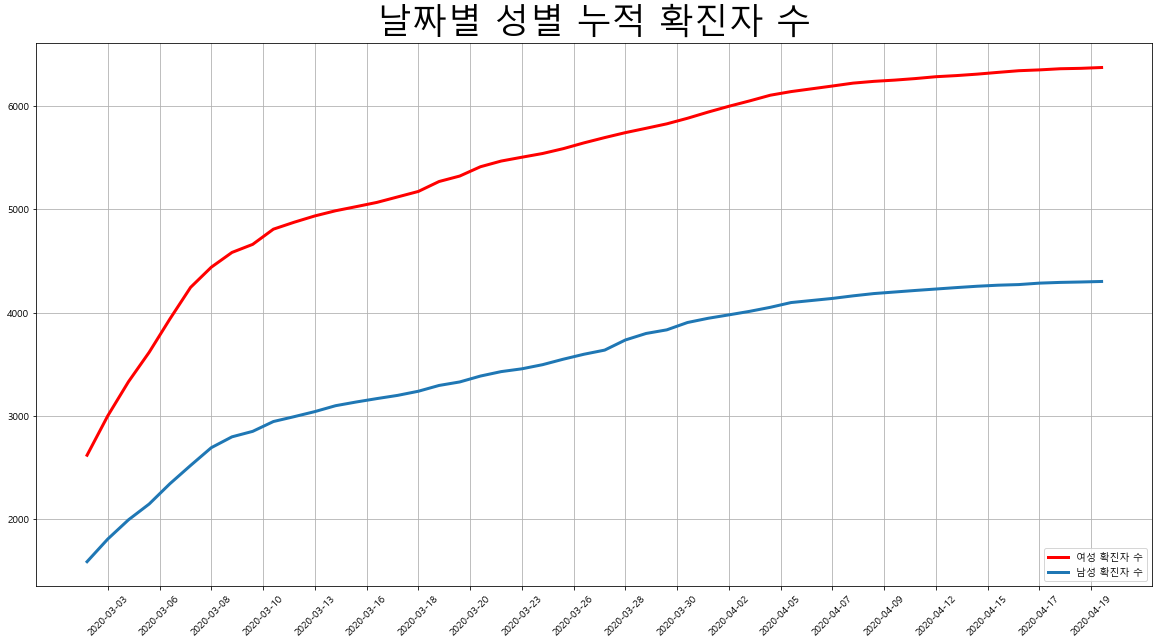

In [49]:
plt.figure(figsize=(20, 10))

plt.plot(df_time_female.date, df_time_female.confirmed,
         linewidth=3, c='r', label='여성 확진자 수')
plt.plot(df_time_male.date, df_time_male.confirmed,
         linewidth=3, label='남성 확진자 수')

plt.xticks(np.arange(1, 50, 2.5), rotation=45)
plt.title('날짜별 성별 누적 확진자 수', fontsize=35)

plt.legend(loc=4)
plt.grid()

- 마지막 날짜를 기준으로 누적 확진자 수 확인
- 여성 확진자 수가 눈에 띄게 더 많음

In [50]:
df_timegender_last=df_timegender.iloc[-2:]
df_timegender_last

,date,time,sex,confirmed,deceased
98,2020-04-20,0,male,4302,125
99,2020-04-20,0,female,6372,111


- 성별 국내 확진자 수 비교

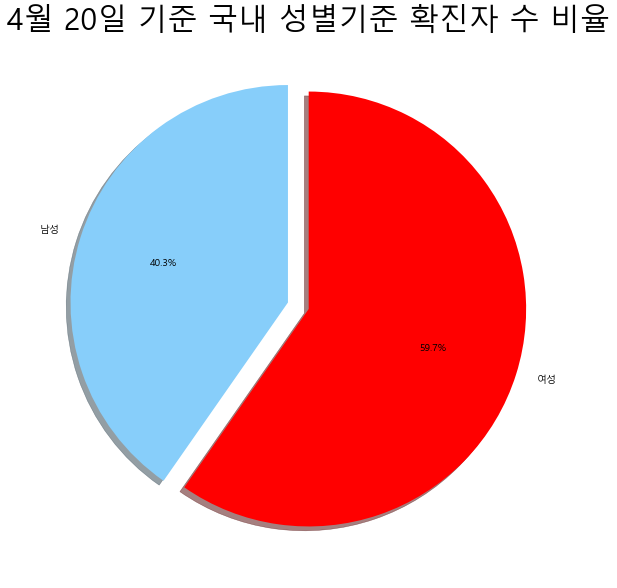

확진자수는 여성이 남성에 비해 약 1.48배 정도 높은 비율로 나타났습니다.










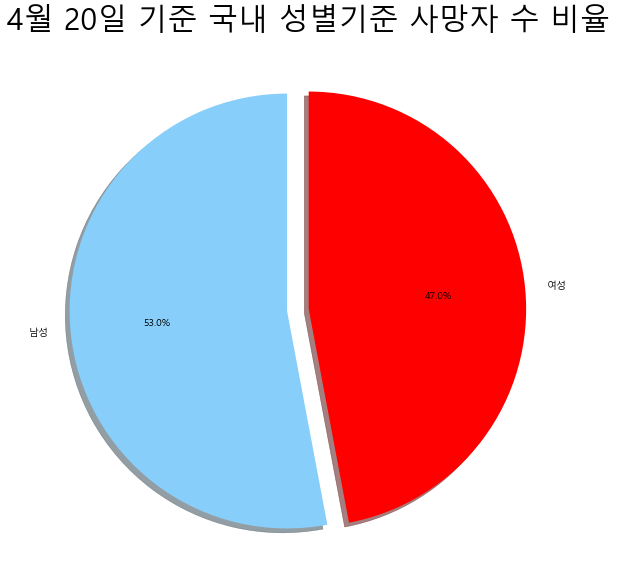

사망자수는 남성이 여성에 비해 약 1.13배 정도 높은 비율로 나타났습니다.










In [51]:
font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')
plt.figure(figsize=(20, 10))
colors = ['lightskyblue', 'red']
labels = ['남성', '여성']
ratio = [int(df_timegender_last.iloc[0, 3])/df_timegender_last['confirmed'].sum(),
         int(df_timegender_last.iloc[1, 3])/df_timegender_last['confirmed'].sum()]
explode = (0.1, 0.0)
plt.title('4월 20일 기준 국내 성별기준 확진자 수 비율',fontsize=30)
plt.pie(ratio, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

lulu = round((int(df_timegender_last.iloc[1, 3])/df_timegender_last['confirmed'].sum())/(
    int(df_timegender_last.iloc[0, 3])/df_timegender_last['confirmed'].sum()), 2)
print('확진자수는 여성이 남성에 비해 약 {}배 정도 높은 비율로 나타났습니다.\n\n\n\n\n\n\n\n'.format(lulu))

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')
plt.figure(figsize=(20,10))
colors = ['lightskyblue', 'red']
labels = ['남성', '여성']
ratio = [int(df_timegender_last.iloc[0,4])/df_timegender_last['deceased'].sum(),
         int(df_timegender_last.iloc[1,4])/df_timegender_last['deceased'].sum() ]
explode = (0.1, 0.0 )
plt.title('4월 20일 기준 국내 성별기준 사망자 수 비율',fontsize=30)

plt.pie(ratio, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()
lulu2 = round((int(df_timegender_last.iloc[0, 4])/df_timegender_last['confirmed'].sum())/(
    int(df_timegender_last.iloc[1, 4])/df_timegender_last['confirmed'].sum()), 2)
print('사망자수는 남성이 여성에 비해 약 {}배 정도 높은 비율로 나타났습니다.\n\n\n\n\n\n\n\n'.format(lulu2))

- 성별 확진자 수 대비 사망자 비율 시각화

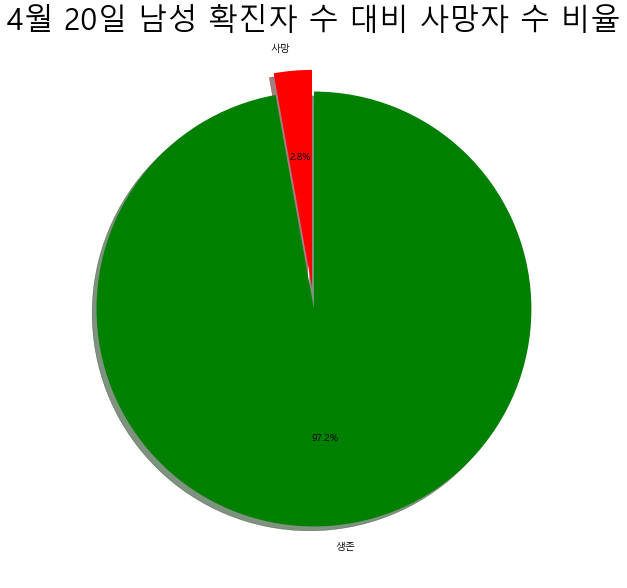

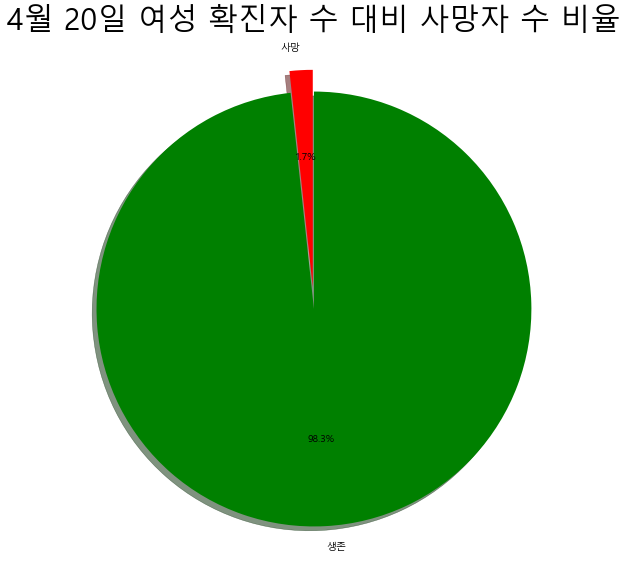

In [52]:
font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')
plt.figure(figsize=(20, 10))
colors = ['red', 'green']
labels = ['사망', '생존']
ratio = [int(df_timegender_last.iloc[0, 4])/(int(df_timegender_last.iloc[0, 4])+int(df_timegender_last.iloc[0, 3])),
         int(df_timegender_last.iloc[0, 3])/(int(df_timegender_last.iloc[0, 4])+int(df_timegender_last.iloc[0, 3]))]
explode = (0.1, 0.0)

plt.title('4월 20일 남성 확진자 수 대비 사망자 수 비율', fontsize=30)

p2 = plt.pie(ratio, explode=explode, labels=labels, colors=colors,
             autopct='%1.1f%%', shadow=True, startangle=90)

font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')
plt.figure(figsize=(20, 10))
colors = ['red', 'green']
labels = ['사망', '생존']
ratio = [int(df_timegender_last.iloc[1, 4])/(int(df_timegender_last.iloc[1, 4])+int(df_timegender_last.iloc[1, 3])),
         int(df_timegender_last.iloc[1, 3])/(int(df_timegender_last.iloc[1, 4])+int(df_timegender_last.iloc[1, 3]))]
explode = (0.1, 0.0)
plt.title('4월 20일 여성 확진자 수 대비 사망자 수 비율', fontsize=30)
p1 = plt.pie(ratio, explode=explode, labels=labels, colors=colors,
             autopct='%1.1f%%', shadow=True, startangle=90)

- 확진자 수는 여성이 더 많은것에 비해 사망률은 남성이 2.8% 이고 여성이 1.7%로 남성의 사망률이 더 높게 나타났습니다.

- 국내에서만 발생한 현상인지 해외 데이터로도 확인해 보았습니다.

### 해외 데이터로 확장

- https://docs.google.com/spreadsheets/d/e/2PACX-1vQU0SIALScXx8VXDX7yKNKWWPKE1YjFlWc6VTEVSN45CklWWf-uWmprQIyLtoPDA18tX9cFDr-aQ9S6/pubhtml

#### 데이터 확인

In [53]:
df_global = pd.read_csv('COVID19_line_list_data.csv')
df_global.tail(5)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
1080,1081,2.0,2/25/2020,NaN,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,...,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...,NaN,NaN,NaN,NaN,NaN,NaN
1081,1082,1.0,2/24/2020,NaN,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,...,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...,NaN,NaN,NaN,NaN,NaN,NaN
1082,1083,1.0,2/26/2020,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,...,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...,NaN,NaN,NaN,NaN,NaN,NaN
1083,1084,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,...,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...,NaN,NaN,NaN,NaN,NaN,NaN
1084,1085,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Switzerland:...,Bern,Switzerland,male,70.0,2/17/2020,...,0,NaN,Reuters,https://www.reuters.com/article/uk-switzerland...,NaN,NaN,NaN,NaN,NaN,NaN


- 성별에 결측치가 있는 행 제거

In [54]:
df_global_del1 = df_global.dropna(subset=['gender'])
df_global_del1.tail(5)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
1077,1078,16.0,2/25/2020,NaN,new COVID-19 patient confirmed in Bahrain: fem...,Bahrain,Bahrain,female,NaN,NaN,...,0,NaN,Gulf News,https://gulfnews.com/world/gulf/bahrain/bahrai...,NaN,NaN,NaN,NaN,NaN,NaN
1078,1079,17.0,2/25/2020,NaN,new COVID-19 patient confirmed in Bahrain: fem...,Bahrain,Bahrain,female,NaN,NaN,...,0,NaN,Gulf News,https://gulfnews.com/world/gulf/bahrain/bahrai...,NaN,NaN,NaN,NaN,NaN,NaN
1082,1083,1.0,2/26/2020,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,...,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...,NaN,NaN,NaN,NaN,NaN,NaN
1083,1084,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,...,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...,NaN,NaN,NaN,NaN,NaN,NaN
1084,1085,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Switzerland:...,Bern,Switzerland,male,70.0,2/17/2020,...,0,NaN,Reuters,https://www.reuters.com/article/uk-switzerland...,NaN,NaN,NaN,NaN,NaN,NaN


- 해외데이터를 성별로 구분해서 변수 지정

In [55]:
df_global1_male = df_global['gender'] == 'male'
df_global1_female = df_global['gender'] == 'female'

df_male2 = df_global[df_global1_male]
df_female2 = df_global[df_global1_female]

- 변수명 확인

In [56]:
df_male2.columns

Index(['id', 'case_in_country', 'reporting date', 'Unnamed: 3', 'summary',
       'location', 'country', 'gender', 'age', 'symptom_onset',
       'If_onset_approximated', 'hosp_visit_date', 'exposure_start',
       'exposure_end', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered',
       'symptom', 'source', 'link', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

- 비율로 나타내기 위해 실수형 데이터로 변환

In [57]:
x1=int(df_male2['gender'].value_counts())
x2=int(df_female2['gender'].value_counts())
x3=int(df_male2['gender'].value_counts())+int(df_female2['gender'].value_counts())

- 전세계 성별 확진자 수 비율 그래프

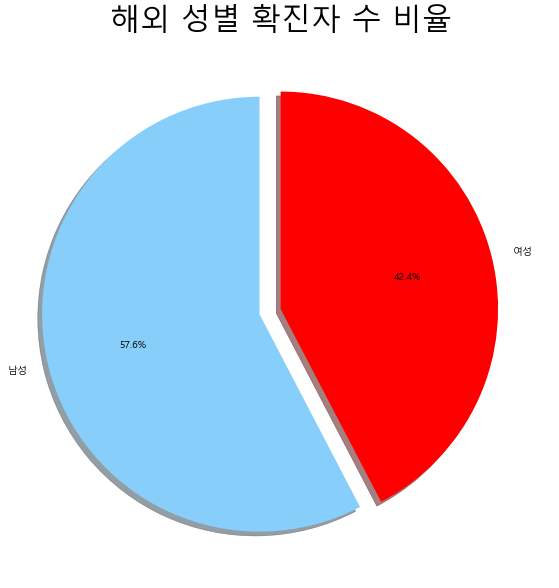

남성의 확진자 수가 여성의 확진자 수보다 1.36배 더 많이 나타났습니다.








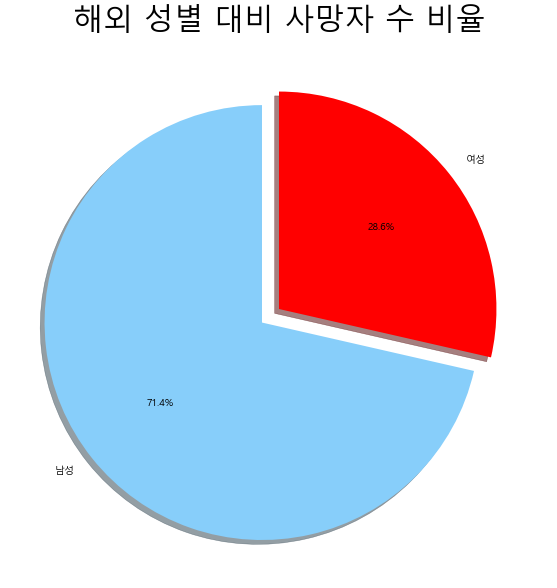

남성의 사망자 수가 여성의 사망자 수보다 2.5배 더 많이 나타났습니다.






In [58]:
font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')
plt.figure(figsize=(20, 10))
colors = ['lightskyblue', 'red']
labels = ['남성', '여성']
ratio = [x1/x3,
         x2/x3]
explode = (0.1, 0.0)
plt.title('해외 성별 확진자 수 비율', fontsize=30)
plt.pie(ratio, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()
print('남성의 확진자 수가 여성의 확진자 수보다 {}배 더 많이 나타났습니다.\n\n\n\n\n\n'.format(
    round((x1/x3)/(x2/x3), 2)))

y1 = df_male2['death'].value_counts()[1]
y2 = df_female2['death'].value_counts()[1]
y3 = df_male2['death'].value_counts()[1] + df_female2['death'].value_counts()[1]


font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

style.use('ggplot')
plt.figure(figsize=(20, 10))
colors = ['lightskyblue', 'red']
labels = ['남성', '여성']
ratio = [y1/y3,
         y2/y3]
explode = (0.1, 0.0)
plt.title('해외 성별 대비 사망자 수 비율', fontsize=30)
plt.pie(ratio, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()
print('남성의 사망자 수가 여성의 사망자 수보다 {}배 더 많이 나타났습니다.\n\n\n\n'.format(
    round((y1/y3)/(y2/y3), 2)))

- 성별 사망률

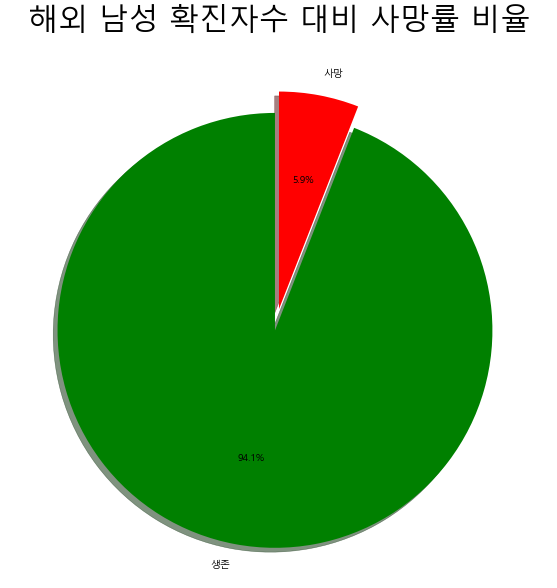

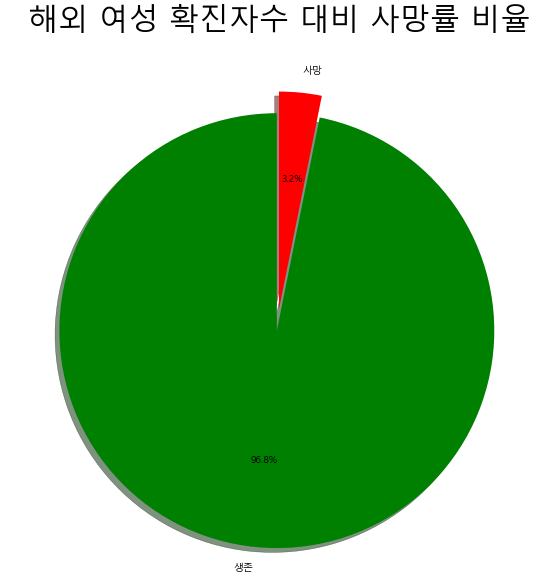

In [59]:
font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')
plt.figure(figsize=(20, 10))
colors = ['green', 'red']
labels = ['생존', '사망']
ratio = [df_male2['death'].value_counts()[0]/df_male2['death'].value_counts()[0],
         df_male2['death'].value_counts()[1]/df_male2['death'].value_counts()[0]]
explode = (0.1, 0.0)
plt.title('해외 남성 확진자수 대비 사망률 비율',fontsize=30)
q1 = plt.pie(ratio, explode=explode, labels=labels, colors=colors,
             autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()
print('\n\n\n\n\n\n\n')

font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')
plt.figure(figsize=(20, 10))
colors = ['green', 'red']
labels = ['생존', '사망']
ratio = [df_female2['death'].value_counts()[0]/df_female2['death'].value_counts()[0],
         df_female2['death'].value_counts()[1]/df_female2['death'].value_counts()[0]]
explode = (0.1, 0.0)
plt.title('해외 여성 확진자수 대비 사망률 비율',fontsize=30)
q2 = plt.pie(ratio, explode=explode, labels=labels, colors=colors,
             autopct='%1.1f%%', shadow=True, startangle=90)

- 남성의 사망률은 5.9% 이고 여성의 사망률은 3.2% 로 국내뿐만 아니라 __해외에서도 남성의 사망률이 훨씬 높게__ 나타났습니다.

- 남성의 사망률이 더 높은 이유로는 __환경적 요인__ 과 __유전적 요인__ 으로 나눌 수 있는데, 이에 대해서는 추후에 좀 더 데이터가 많아지고, 코로나에 관한 논문이 자세해진다면 확인해보도록 하겠습니다.

## 4) 정책이 확진자수 변화에 미치는 영향

#### 데이터 확인

In [60]:
patient = df_patientinfo
times = df_time

In [61]:
patient.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


- time 데이터 전처리 

In [62]:
times["date"] = times["date"].astype("str")
times

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
87,2020-04-16,0,538775,513894,10613,7757,229
88,2020-04-17,0,546463,521642,10635,7829,230
89,2020-04-18,0,554834,530631,10653,7937,232
90,2020-04-19,0,559109,536205,10661,8042,234


#### 데이터 전처리

- 4.1일 데이터

In [63]:
date_patient = patient[['patient_id', 'confirmed_date', 'country', 'infection_case']]
date_patient = date_patient.sort_values(by='confirmed_date').reset_index()
patient_1= date_patient.loc[date_patient['confirmed_date']=='2020-04-01']
patient_1.head()

,index,patient_id,confirmed_date,country,infection_case
2882,480,1000000481,2020-04-01,Korea,overseas inflow
2883,481,1000000482,2020-04-01,Korea,overseas inflow
2884,483,1000000484,2020-04-01,Korea,overseas inflow
2885,1016,1600000040,2020-04-01,Korea,overseas inflow
2886,484,1000000485,2020-04-01,Korea,overseas inflow


In [64]:
patient_1.iloc[0].name

2882

- 4.1일 이전 데이터

In [65]:
march =  date_patient[:patient_1.iloc[0].name]
before_kor = march.loc[march['infection_case']!='overseas inflow']
before_overseas = march.loc[march['infection_case']=='overseas inflow']
before_overseas.sort_values(by='confirmed_date', ascending=False).head()

,index,patient_id,confirmed_date,country,infection_case
2881,469,1000000470,2020-03-31,Korea,overseas inflow
2826,1555,2000000491,2020-03-31,Korea,overseas inflow
2836,914,1400000069,2020-03-31,Korea,overseas inflow
2833,839,1300000024,2020-03-31,Korea,overseas inflow
2832,838,1300000023,2020-03-31,Korea,overseas inflow


- 4.1일 이후 데이터

In [66]:
april =  date_patient[patient_1.iloc[0].name:]
after_kor = april.loc[april['infection_case']!='overseas inflow']
after_overseas = april.loc[april['infection_case']=='overseas inflow']
after_overseas.head()

,index,patient_id,confirmed_date,country,infection_case
2882,480,1000000481,2020-04-01,Korea,overseas inflow
2883,481,1000000482,2020-04-01,Korea,overseas inflow
2884,483,1000000484,2020-04-01,Korea,overseas inflow
2885,1016,1600000040,2020-04-01,Korea,overseas inflow
2886,484,1000000485,2020-04-01,Korea,overseas inflow


#### 정책별 확진자수 변화 시각화

- 정책별 국내 확진자수 

In [67]:
date = list(times.date)

v1 = times.confirmed
v2 = times.released
v3 = times.deceased

line = Line('')
line.add('누적 확인자 수', date, v1, is_symbol_show=True, is_legend_show=True,
         mark_point=['max'])
line.add('누적 완치자 수', date, v2, is_symbol_show=True, is_legend_show=True,
        mark_point=['max'])
line.add('일별 사망자수', date, v3, is_symbol_show=True, is_legend_show=True, 
        mark_point=['max'])


times['Policy1']= 0 
times['Policy2']= 0 
times['Policy3']= 0 
times['Policy4']= 0 
times.loc[times['date']=='2020-04-01',"Policy1"]=12000
times.loc[times['date']=='2020-03-19',"Policy2"]=12000
times.loc[times['date']=='2020-03-22',"Policy3"]=12000
times.loc[times['date']=='2020-02-24',"Policy4"]=12000

policy1 = list(times.Policy1)
policy2 = list(times.Policy2)
policy3 = list(times.Policy3)
policy4 = list(times.Policy4)

bar=Bar('')
bar.add("해외 입국자 2주간 자가 격리 ",date,policy1)
bar.add("특별 입국 관리 실시 ",date,policy2)
bar.add("사회적 거리두기 실시",date,policy3)
bar.add("심각단계 변경",date,policy4)


overlap=Overlap()
overlap.add(bar)
overlap.add(line)

overlap

#### 4.1 전후 해외 입국자 자가격리 정책이 국내에 미친 영향 시각화

In [68]:
from pyecharts import Pie
before_kor = len(before_kor)
before_over = len(before_overseas)
after_kor = len(after_kor)
after_over = len(after_overseas)

name = ['해외 감염자', '국내 감염자']
data = [before_over, before_kor]
data2 = [after_over, after_kor]
pie = Pie("4.1 전/후 해외 감염자, 국내 감염자 비율", title_pos="center")
pie.add("4.1 전", name, data, center=[25,50], radius=[20,40], is_label_show=True,
       legend_orient='vertical', legend_pos='left')
pie.add("4.1 후", name, data2, center=[65,50], radius=[20,40], is_label_show=True,
       legend_orient='vertical', legend_pos='left')
pie

- 해외 감염자에 미친 영향만 확인하기 위해 해외 감염자만 추출

In [69]:
overseas = patient.loc[patient['infection_case']=='overseas inflow']
overseas = overseas[['patient_id','country','confirmed_date']]
o_patient = overseas.groupby(by='confirmed_date').count()
o_patient.head()

,patient_id,country
confirmed_date,,
2020-01-20,1,1
2020-01-23,1,1
2020-01-26,1,1
2020-01-27,1,1
2020-01-30,2,2


- 정책에 따른 해외 유입인원 확진자수 시각화

In [70]:
name = o_patient.index
data = o_patient.patient_id

line = Line("")
line.add("Daily Number of overseas infected", name, data, is_symbol_show=True, is_legend_show=True,
         mark_point=['max'],mark_line=['average'])

o_patient["Policy1"]=0
o_patient["Policy2"]=0
o_patient.loc[o_patient.index=='2020-04-01',"Policy1"]=50
o_patient.loc[o_patient.index=='2020-03-19',"Policy2"]=50
policy1 = list(o_patient.Policy1)
policy2 = list(o_patient.Policy2)

bar=Bar('')
bar.add("Overseas Isolation 2week",name,policy1)
bar.add("Special Quarantin Declaration",name,policy2)


overlap=Overlap()
overlap.add(bar)
overlap.add(line)

overlap

## 5) 연령이 완치율에 미치는 영향

### 데이터 전처리

In [71]:
PatientInfo = pd.read_csv('PatientInfo.csv')
Region = pd.read_csv('Region.csv')
Time = pd.read_csv('Time.csv')
TimeProvince = pd.read_csv('TimeProvince.csv')

- 출생년도 기준 실제나이 계산

In [72]:
PatientInfo['real_age'] = 2020 - PatientInfo['birth_year']

- 출생년도, 실제나이 결측치 평균으로 대체

In [73]:
t = PatientInfo.groupby('age')['birth_year'].mean()
for idx, val in t.items():
    PatientInfo.loc[PatientInfo['birth_year'].isnull() & (PatientInfo['age'] == idx), 'birth_year'] = val

PatientInfo['real_age'] = 2020 - PatientInfo['birth_year']

- 나이관련 필드의 null 개수 확인

In [74]:
PatientInfo[['birth_year', 'age', 'real_age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   birth_year  3252 non-null   float64
 1   age         3252 non-null   object 
 2   real_age    3252 non-null   float64
dtypes: float64(2), object(1)
memory usage: 78.1+ KB


#### 환자의 상태와 날짜 결측치 처리

 - 환자의 상태 field와 날짜에 대한 field가 맞지 않음
 - 격리(isolated)상태인데 확진일자가 없거나, 복귀(released)상태인데 완치일이 없는 경우
 - __날짜값이 없는 데이터를 예측하고자 하면 문제가 생김__

In [75]:
PatientInfo['state'].value_counts()

released    1637
isolated    1622
deceased      67
Name: state, dtype: int64

- 상태에 대한 값이 없으나 확진일자가 있는경우 상태를 isolated로 변경

In [76]:
PatientInfo.loc[PatientInfo['state'].isnull() & PatientInfo['confirmed_date'].notnull(), 'state'] = 'isolated'

- 확진으로 격리상태이나 확진일자가 없음경우 확인 

In [77]:
t = PatientInfo.loc[(PatientInfo['state'] == 'isolated') & PatientInfo['confirmed_date'].isnull(), :]
print('격리상태이나 확진일자 없음:', len(t), '건')
t.head(3)

격리상태이나 확진일자 없음: 3 건


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,real_age
2923,6011000051,NaN,female,1980.0,40s,Korea,Gyeongsangbuk-do,Andong-si,NaN,etc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isolated,40.0
2924,6011000052,NaN,female,2011.0,0s,Korea,Gyeongsangbuk-do,Andong-si,NaN,etc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isolated,9.0
2925,6011000053,NaN,female,2001.0,10s,Korea,Gyeongsangbuk-do,Andong-si,NaN,etc,NaN,NaN,NaN,2020-04-15,NaN,NaN,NaN,isolated,19.0


- 데이터에 격리상태인데 완치일자가 존재하는 경우 상태를 relased로 변경

In [78]:
PatientInfo.loc[(PatientInfo['state'] == 'isolated') & PatientInfo['released_date'].notnull(), 'state'] = 'released'

- 완치상태이나 완치일자가 없는경우 확인

In [79]:
t = PatientInfo.loc[(PatientInfo['state'] == 'released') & PatientInfo['released_date'].isnull(), :]
print('완치상태이나 완치일자 없음:', len(t), '건')
t.head(3)

완치상태이나 완치일자 없음: 428 건


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,real_age
12,1000000013,29.0,male,1938.0,80s,Korea,Seoul,Jongno-gu,NaN,contact with patient,4.0,1.000000e+09,117.0,NaN,2020-02-16,NaN,NaN,released,82.0
17,1000000018,111.0,male,2000.0,20s,Korea,Seoul,etc,NaN,etc,NaN,NaN,NaN,NaN,2020-02-20,NaN,NaN,released,20.0
19,1000000020,121.0,female,1944.0,70s,Korea,Seoul,Seongdong-gu,NaN,Seongdong-gu APT,NaN,1.000000e+09,NaN,NaN,2020-02-20,NaN,NaN,released,76.0


- 사망상태이나 사망일자가 없는 경우 확인

In [80]:
t = PatientInfo.loc[(PatientInfo['state'] == 'deceased') & PatientInfo['deceased_date'].isnull(), :]
print('사망상태이나 사망일자 없음:', len(t), '건')
t.head()

사망상태이나 사망일자 없음: 7 건


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,real_age
108,1000000109,6773.0,male,1929.0,90s,Korea,Seoul,etc,NaN,contact with patient,NaN,NaN,NaN,2020-03-02,2020-03-07,NaN,NaN,deceased,91.0
284,1000000285,8602.0,male,1976.0,40s,Korea,Seoul,Mapo-gu,NaN,Guro-gu Call Center,NaN,NaN,NaN,NaN,2020-03-19,NaN,NaN,deceased,44.0
694,1100000071,NaN,male,1941.0,70s,Korea,Busan,Busanjin-gu,NaN,etc,NaN,NaN,1.0,2020-02-28,2020-02-28,NaN,NaN,deceased,79.0
718,1100000095,NaN,female,1932.0,80s,Korea,Busan,etc,NaN,NaN,NaN,NaN,24.0,2020-02-15,2020-03-13,NaN,NaN,deceased,88.0
720,1100000097,NaN,male,1947.0,70s,Korea,Busan,Busanjin-gu,NaN,etc,NaN,NaN,11.0,2020-03-09,2020-03-13,NaN,NaN,deceased,73.0


### 날짜 전처리
 - 날짜자체를 날짜 형식으로 변환
 - 기간(period) 필드를 추가
   - symptom_confirmed_period: 상태발현 부터 확진까지 기간
   - confirmed_released_period: 확진 부터 완치까지 기간
   - confirmed_deceased_period: 확진 부터 사망까지 기간

- 날짜형식으로 변환

In [81]:
PatientInfo['symptom_onset_date'] = pd.to_datetime(PatientInfo['symptom_onset_date'],errors='coerce', format='%Y-%m-%d')

- 날짜데이터 중 invalid한것을 NA(T)로 세팅 (If 'coerce', then invalid parsing will be set as NaT)

In [82]:
PatientInfo['confirmed_date'] = pd.to_datetime(PatientInfo['confirmed_date'], format='%Y-%m-%d')
PatientInfo['released_date'] = pd.to_datetime(PatientInfo['released_date'], format='%Y-%m-%d')
PatientInfo['deceased_date'] = pd.to_datetime(PatientInfo['deceased_date'], format='%Y-%m-%d')

- 날짜간의 기간을 계산

In [83]:
PatientInfo['symptom_confirmed_period'] = PatientInfo['confirmed_date'] - PatientInfo['symptom_onset_date']
PatientInfo['confirmed_released_period'] = PatientInfo['released_date'] - PatientInfo['confirmed_date']
PatientInfo['confirmed_deceased_period'] = PatientInfo['deceased_date'] - PatientInfo['confirmed_date']

PatientInfo[['symptom_onset_date', 'confirmed_date','released_date', 'deceased_date', 'symptom_confirmed_period', 'confirmed_released_period', 'confirmed_deceased_period']].head()

,symptom_onset_date,confirmed_date,released_date,deceased_date,symptom_confirmed_period,confirmed_released_period,confirmed_deceased_period
0,2020-01-22,2020-01-23,2020-02-05,NaT,1 days,13 days,NaT
1,NaT,2020-01-30,2020-03-02,NaT,NaT,32 days,NaT
2,NaT,2020-01-30,2020-02-19,NaT,NaT,20 days,NaT
3,2020-01-26,2020-01-30,2020-02-15,NaT,4 days,16 days,NaT
4,NaT,2020-01-31,2020-02-24,NaT,NaT,24 days,NaT


### 고령자의 사망가능성과 젊을수록 완치율이 높은지에 대해 검정

- 연령대별 사망 완치 관측치

In [84]:
df = PatientInfo[PatientInfo['age'].notnull() & PatientInfo['state'].isin(['released', 'deceased'])]
obs = pd.pivot_table(df, index='age', columns=['state'], values=['patient_id'], aggfunc=[len])
obs = obs.fillna(0)
obs.columns = ['deceased', 'released']
obs 

,deceased,released
age,,
0s,0.0,29.0
10s,0.0,76.0
20s,0.0,444.0
30s,1.0,226.0
40s,2.0,256.0
50s,7.0,316.0
60s,11.0,174.0
70s,18.0,66.0
80s,21.0,37.0


- 카이제곱 검정을 통해  사망 기대치와 완치 기대치를 분석

- 사망 기대치  완치 기대치

In [85]:
from scipy.stats import chi2_contingency
c, p, dof, ex = chi2_contingency(obs, correction=False) # 카이제곱 검정
exp = pd.DataFrame(ex, obs.index, columns=['dec exp', 'rel exp'])
exp 

,dec exp,rel exp
age,,
0s,1.141598,27.858402
10s,2.991774,73.008226
20s,17.478261,426.521739
30s,8.935958,218.064042
40s,10.156287,247.843713
50s,12.715041,310.284959
60s,7.282609,177.717391
70s,3.306698,80.693302
80s,2.283196,55.716804


- 사망의 경우: 40대 이전까지는 기대치보다 적게 사망하며, 50대 부터는 기대치보다 사망이 많아지는 경향
- 완치의 경우 : 40대 이전까지는 기대치보다 많이 완치되며, 50대 부터는 기대치보다 완치가 적어지는 경항 
- __40대까지는 예상보다 코로나의 사망이 적고 완치가 잘 되며 50대 이후부터는 사망자가 늘며 완치는 어려워짐__

### 연령대별 사망/완치 기대치 시각화

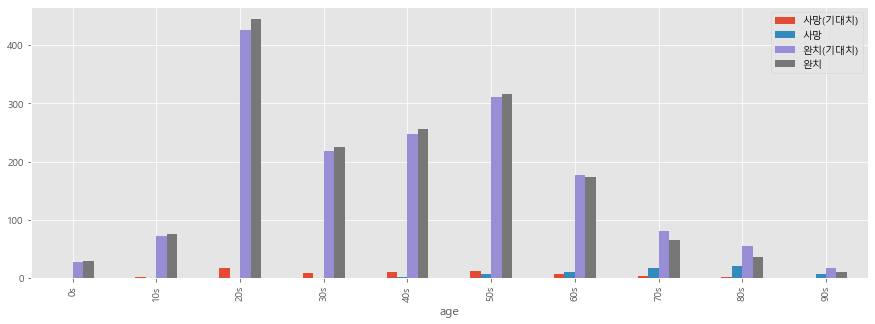

In [86]:
df = pd.concat([obs, exp], axis=1).sort_index(axis=1)
df.columns = ['사망(기대치)', '사망', '완치(기대치)', '완치']
df.plot.bar(figsize=(15,5))

In [87]:
df = PatientInfo.loc[PatientInfo['confirmed_released_period'].notnull() & PatientInfo['sex'].notnull(), ['sex', 'real_age', 'confirmed_released_period']]
df['confirmed_released_period'] = df['confirmed_released_period'].dt.days
df.loc[df['sex']=='male', 'sex'] = 0
df.loc[df['sex']=='female', 'sex'] = 1
df.head()

,sex,real_age,confirmed_released_period
0,0,56.0,13
1,0,33.0,32
2,0,56.0,20
3,0,29.0,16
4,1,28.0,24


- 나이와 기간 시각화 (성별을 색상으로 표시) 

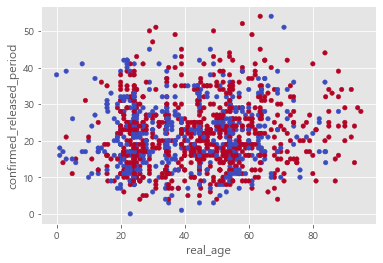

In [88]:
df.plot.scatter(x='real_age', y='confirmed_released_period', c='sex',colormap='coolwarm', colorbar=False)

- 나이와 기간의 상관계수를 계산

In [89]:
corr = df['real_age'].corr(df['confirmed_released_period'])
print('상관계수:{0:.3f}'.format(corr))
corr

상관계수:0.085


0.08453638260821017

- __상관계수 = 0.085로 1보다 현저히 작으므로 상관관계가 없음__

## 6) 코로나 발병 전후에 따른 미세먼지 농도 변화

 - 미세먼지 수치는 cleanair.seoul.go.kr 데이터 사용

1. 2019년 1-4월 미세먼지 데이터

In [91]:
df_PM1 = pd.read_csv('1901-04PM.csv')

In [92]:
df_PM1.head(3)

,date,PM
0,2019-01-01,25
1,2019-01-02,22
2,2019-01-03,24


Text(0.5, 1.0, '2019 PM')

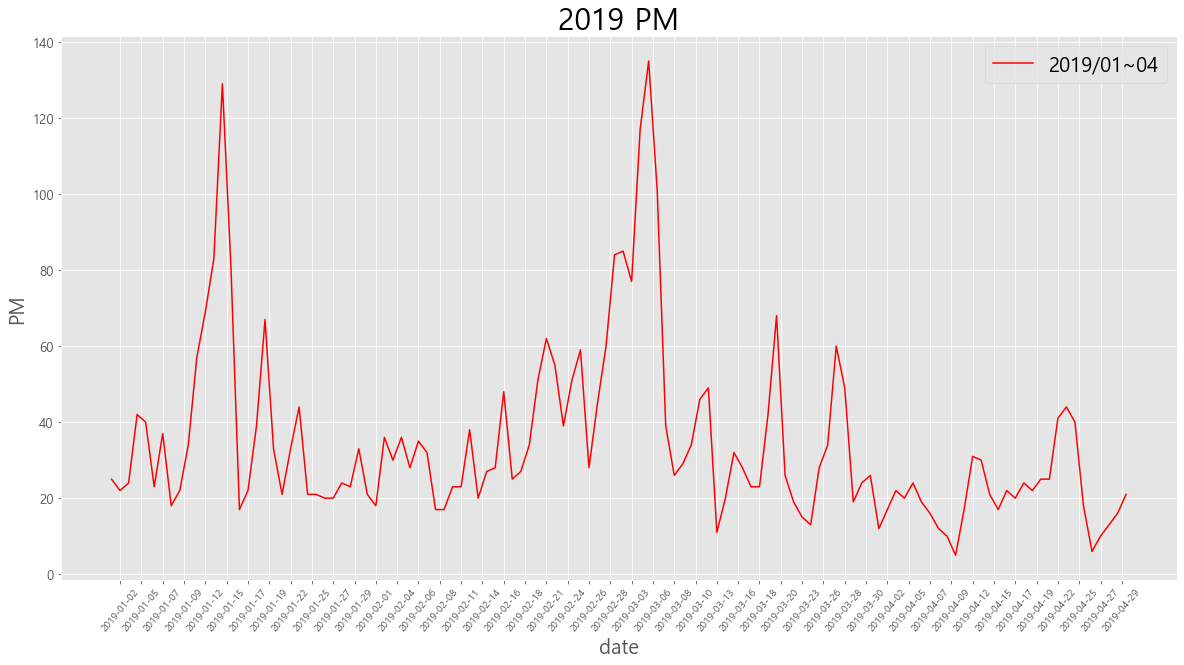

In [93]:
plt.figure(figsize=(20,10))
plt.plot(df_PM1['date'], df_PM1['PM'], color='red')
plt.xticks(np.arange(1, 120, 2.5),rotation=50, size=10)
plt.yticks(size=13)
plt.xlabel('date', fontsize=20)
plt.ylabel('PM', fontsize=20)
plt.legend(['2019/01~04'], loc='best', fontsize=20)
plt.title('2019 PM', size=30)

2. 2020년 1-4월 미세먼지 데이터

In [94]:
df_PM2 = pd.read_csv('2001-04PM.csv')

Text(0.5, 1.0, '2020 PM')

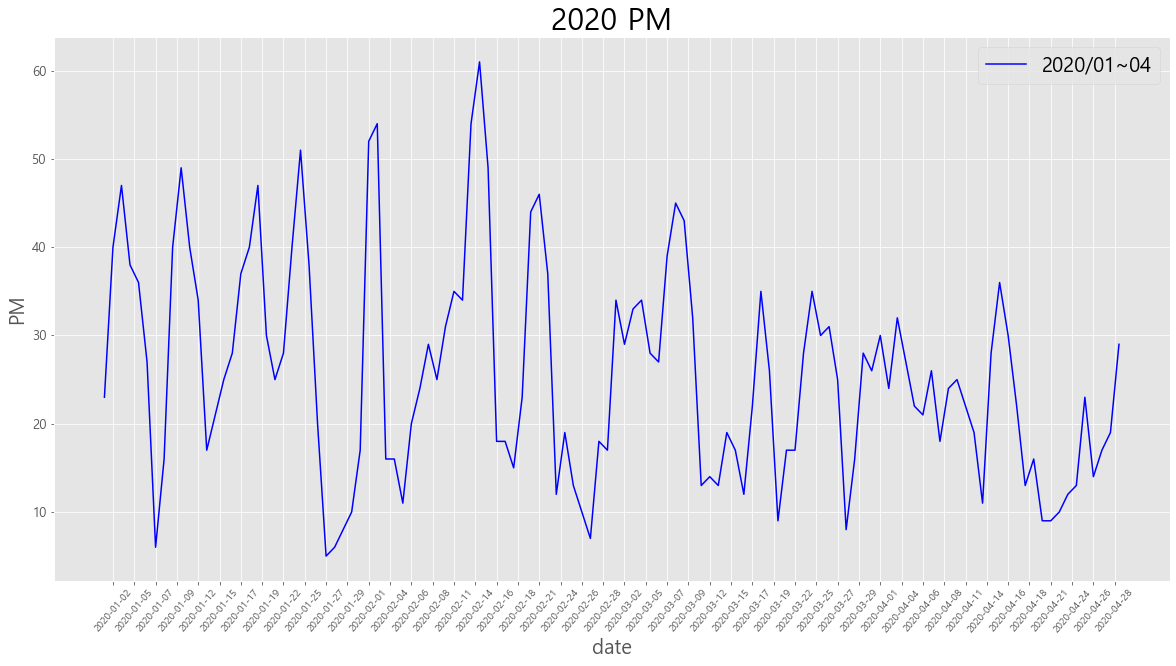

In [95]:
plt.figure(figsize=(20,10))
plt.plot(df_PM2['date'], df_PM2['PM'], color='blue')
plt.xticks(np.arange(1, 120, 2.5),rotation=50, size=10)
plt.yticks(size=13)
plt.xlabel('date', fontsize=20)
plt.ylabel('PM', fontsize=20)
plt.legend(['2020/01~04'], loc='best', fontsize=20)
plt.title('2020 PM', size=30)

3. 2019년 2020년 데이터 합침

In [96]:
df_PM = pd.read_csv('PM_sum_1.csv')

In [97]:
df_PM.head(3)

,date,1901,1902,1903,1904,2001,2002,2003,2004
0,1,25,18.0,84,12.0,23,52.0,34,30.0
1,2,22,36.0,85,17.0,40,54.0,29,24.0
2,3,24,30.0,77,22.0,47,16.0,33,32.0


Text(0.5, 1.0, '2019&2020 PM')

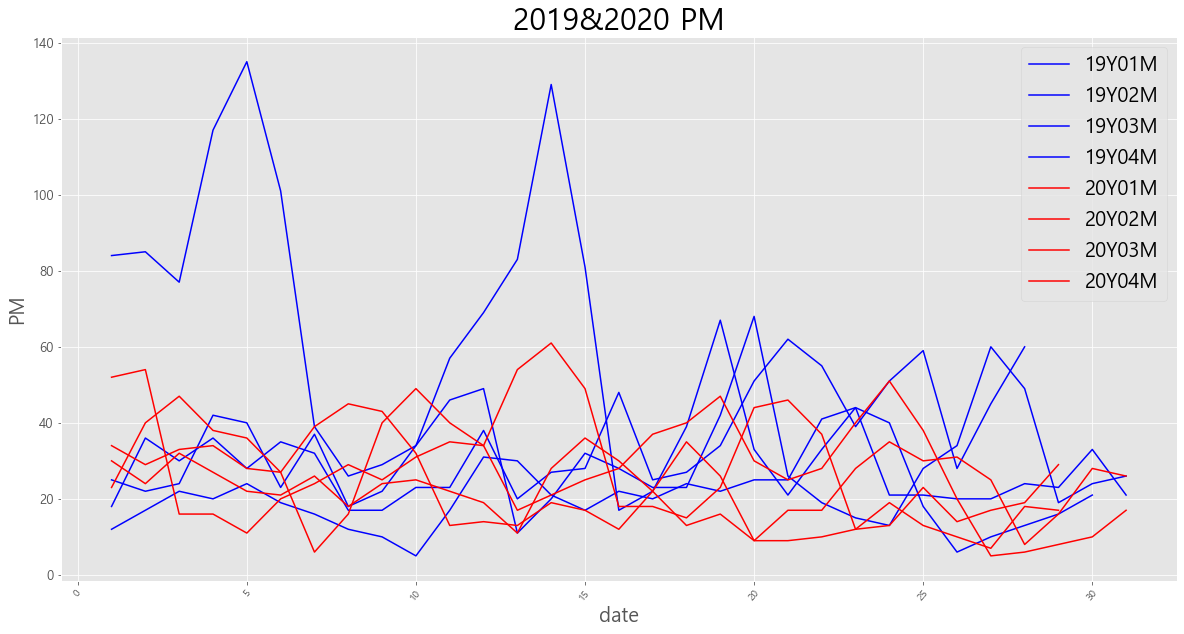

In [98]:
plt.figure(figsize=(20,10))
plt.plot(df_PM['date'], df_PM['1901'], color='blue')
plt.plot(df_PM['date'], df_PM['1902'], color='blue')
plt.plot(df_PM['date'], df_PM['1903'], color='blue')
plt.plot(df_PM['date'], df_PM['1904'], color='blue')
plt.plot(df_PM['date'], df_PM['2001'], color='red')
plt.plot(df_PM['date'], df_PM['2002'], color='red')
plt.plot(df_PM['date'], df_PM['2003'], color='red')
plt.plot(df_PM['date'], df_PM['2004'], color='red')
plt.xticks(rotation=50, size=10)
plt.yticks(size=13)
plt.xlabel('date', fontsize=20)
plt.ylabel('PM', fontsize=20)
plt.legend(['19Y01M', '19Y02M', '19Y03M', '19Y04M', '20Y01M', '20Y02M', '20Y03M', '20Y04M'], loc='best', fontsize=20)
plt.title('2019&2020 PM', size=30)

분석하고자 하는 부분이 명확하지 않음

4. 년도별 동월의 데이터를 그래프로 표현

Text(0.5, 1.0, '2019&2020 PM')

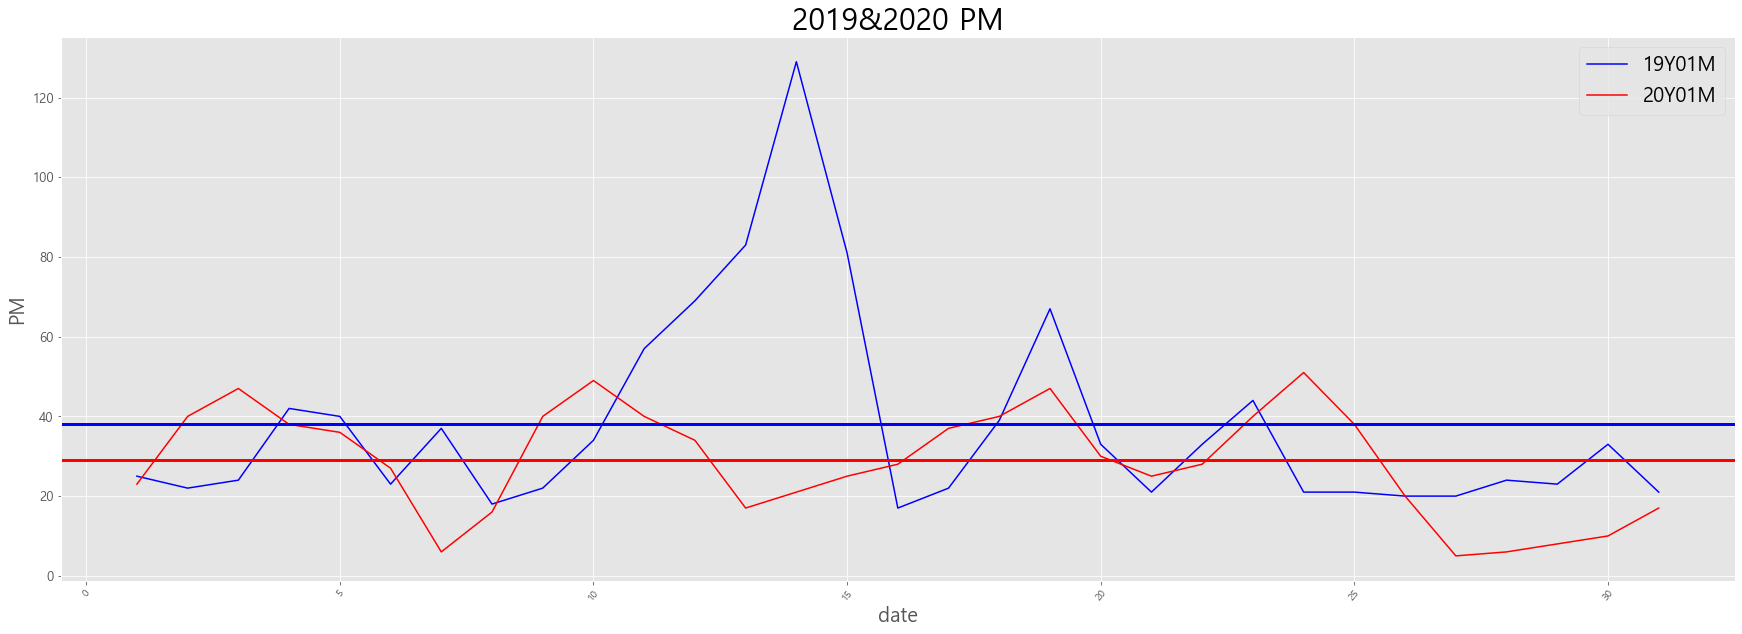

In [99]:
plt.figure(figsize=(30,10))
plt.plot(df_PM['date'], df_PM['1901'], color='blue')
plt.plot(df_PM['date'], df_PM['2001'], color='red')
plt.xticks(rotation=50, size=10)
plt.yticks(size=13)
plt.axhline(y= 38, color='blue', linewidth=3)
plt.axhline(y= 29, color='red', linewidth=3)
plt.xlabel('date', fontsize=20)
plt.ylabel('PM', fontsize=20)
plt.legend(['19Y01M', '20Y01M'], loc='best', fontsize=20)
plt.title('2019&2020 PM', size=30)

Text(0.5, 1.0, '2019&2020 PM')

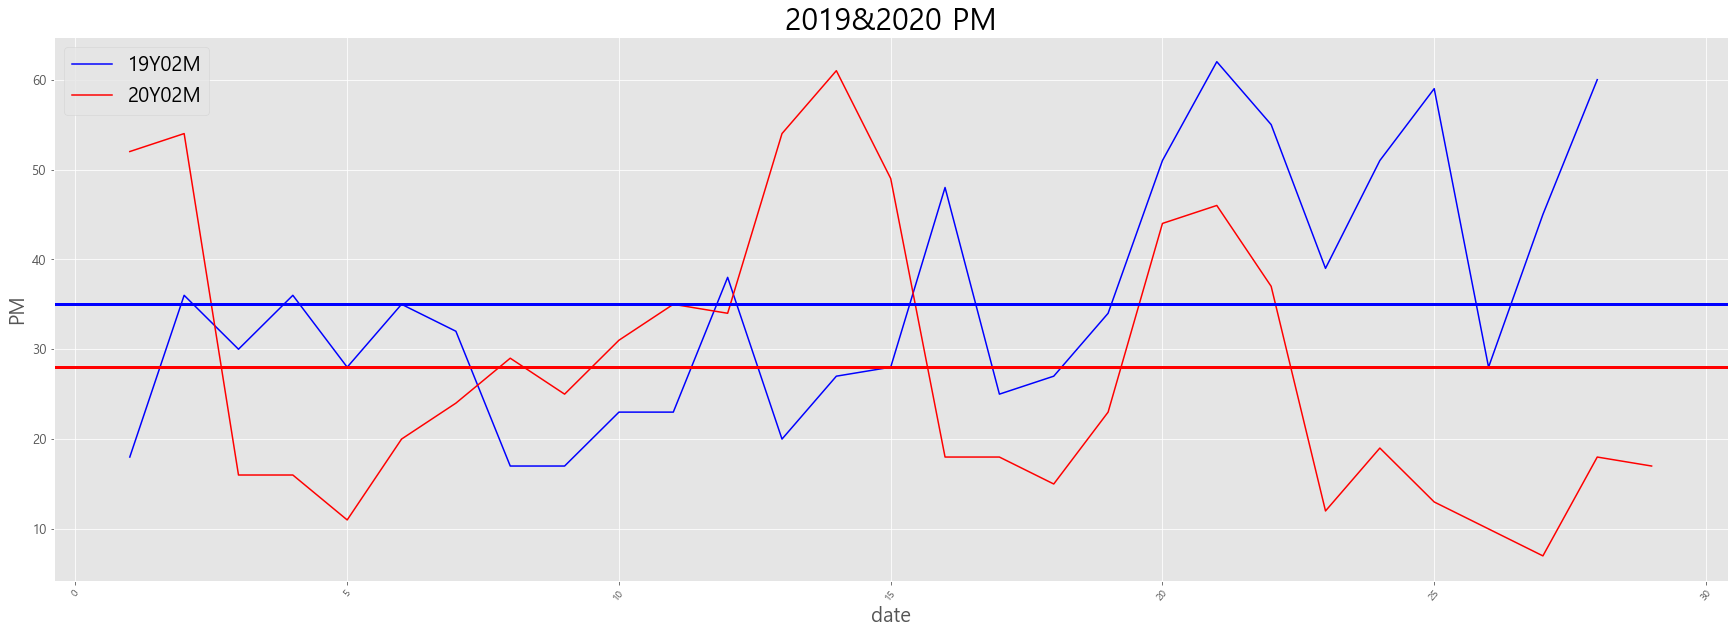

In [100]:
plt.figure(figsize=(30,10))
plt.plot(df_PM['date'], df_PM['1902'], color='blue')
plt.plot(df_PM['date'], df_PM['2002'], color='red')
plt.xticks(rotation=50, size=10)
plt.yticks(size=13)
plt.axhline(y= 35, color='blue', linewidth=3)
plt.axhline(y= 28, color='red', linewidth=3)
plt.xlabel('date', fontsize=20)
plt.ylabel('PM', fontsize=20)
plt.legend(['19Y02M', '20Y02M'], loc='best', fontsize=20)
plt.title('2019&2020 PM', size=30)

Text(0.5, 1.0, '2019&2020 PM')

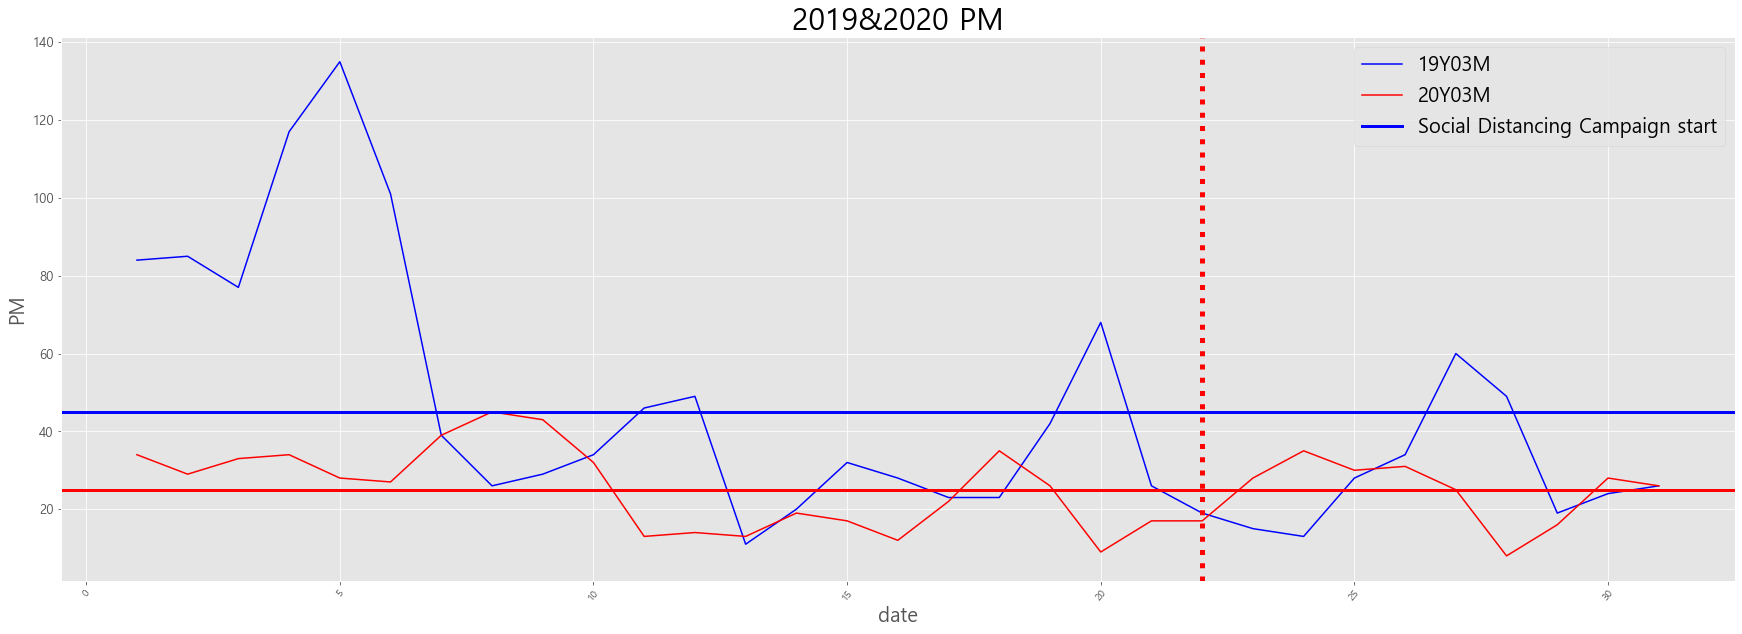

In [101]:
plt.figure(figsize=(30,10))
plt.plot(df_PM['date'], df_PM['1903'], color='blue')
plt.plot(df_PM['date'], df_PM['2003'], color='red')
plt.xticks(rotation=50, size=10)
plt.yticks(size=13)
plt.axhline(y= 45, color='blue', linewidth=3)
plt.axhline(y= 25, color='red', linewidth=3)
plt.axvline(x= 22, ls=':', c='r', linewidth= 5)
plt.xlabel('date', fontsize=20)
plt.ylabel('PM', fontsize=20)
plt.legend(['19Y03M', '20Y03M', 'Social Distancing Campaign start'], loc='best', fontsize=20)
plt.title('2019&2020 PM', size=30)

Text(0.5, 1.0, '2019&2020 PM')

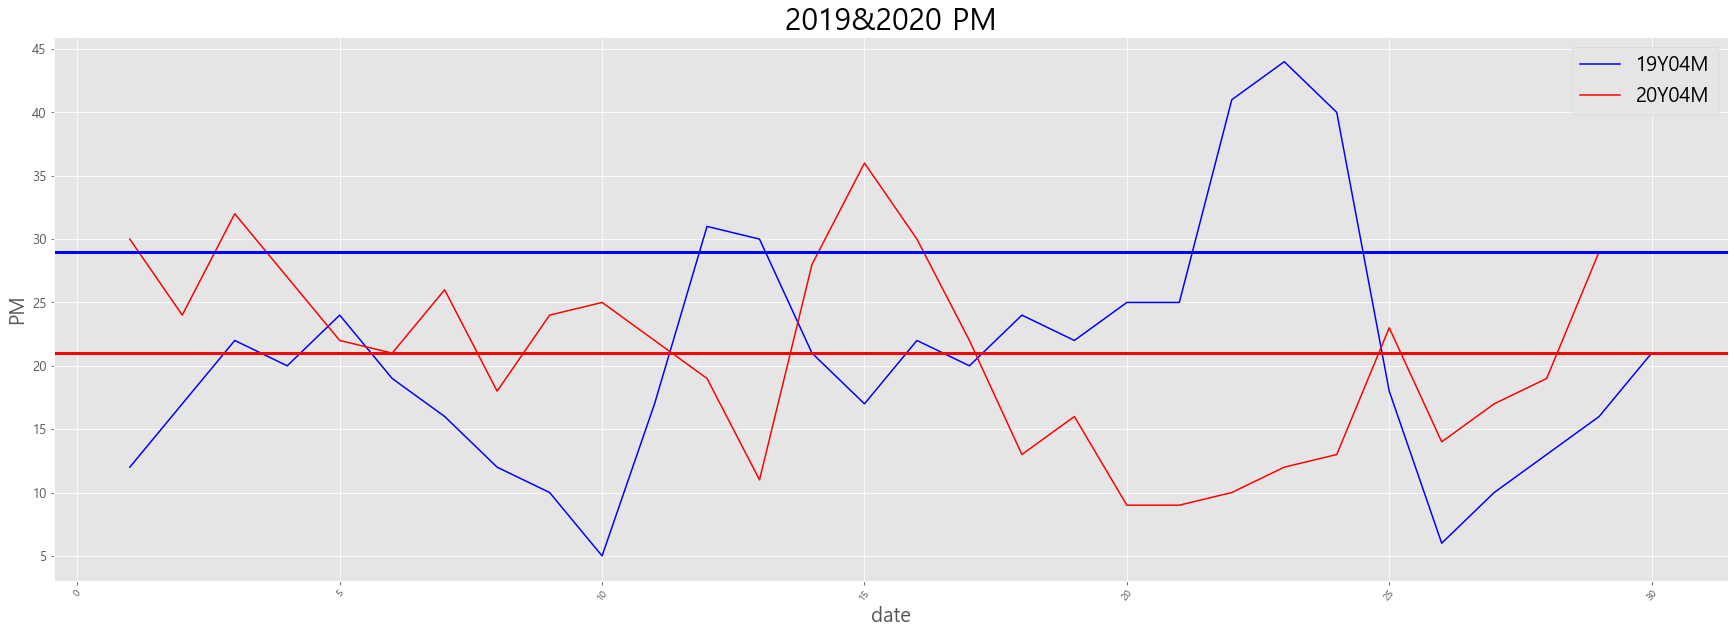

In [102]:
plt.figure(figsize=(30,10))
plt.plot(df_PM['date'], df_PM['1904'], color='blue')
plt.plot(df_PM['date'], df_PM['2004'], color='red')
plt.xticks(rotation=50, size=10)
plt.yticks(size=13)
plt.axhline(y= 29, color='blue', linewidth=3)
plt.axhline(y= 21, color='red', linewidth=3)
plt.xlabel('date', fontsize=20)
plt.ylabel('PM', fontsize=20)
plt.legend(['19Y04M', '20Y04M'], loc='best', fontsize=20)
plt.title('2019&2020 PM', size=30)

# 4월은 동일

```
평균적으로 2019년 대비 미세먼지양의 차이가 확연함
사회적거리두기와 관계없이 미세먼지양이 줄어듬
추가적으로 중국 미세먼지 농도를 코로나 발생 전후로 진행해보고자 함
```